# **=====================EEG========================**

# Imports

In [1]:
%matplotlib inline

In [2]:
!pip install mne==1.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.2 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import mne
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mne import viz
from mne.preprocessing import ICA
from mne.viz import plot_topomap

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load & visualize data

In [8]:
raw_data = pd.read_csv("/content/drive/MyDrive/Work/Physio_data_anonyme.csv")
raw_data

personId  payload.fSample  payload.Saw  payload.Bip17  payload.Aux29  \
0             S1            512.0         59.0      20.193839   1.045915e+06   
1             S1            512.0         63.0      21.807994   1.045920e+06   
2             S1            512.0          3.0      21.586040   1.045908e+06   
3             S1            512.0          7.0      22.746097   1.045897e+06   
4             S1            512.0         11.0      21.542063   1.045883e+06   
...          ...              ...          ...            ...            ...   
2000954      S11            256.0         35.0     -12.777516  -3.885175e+04   
2000955      S11            256.0         37.0      -9.148857  -3.885696e+04   
2000956      S11            256.0         39.0      -4.038643  -3.886125e+04   
2000957      S11            256.0         41.0       1.206258  -3.884998e+04   
2000958      S11            256.0         43.0       2.893667  -3.884071e+04   

         payload.ExG1  payload.ExG2  payload.ExG3  payload.ExG4  payload.ExG5  \
0           -3.172678     -6.775508    -17.481950      5.405044      5.044143   
1          -13.756806     -6.023029    -10.269828      9.859955      7.209159   
2          -14.112136     -6.132827    -13.405634      9.134023      6.605245   
3           -1.869954     -1.905948     -4.325034      4.175356     -0.038969   
4            7.279869      5.932812     13.009533     -0.167920     -2.622712   
...               ...           ...           ...           ...           ...   
2000954    -10.440122     -5.345219     -5.884898     -1.262085     -2.636137   
2000955     -2.601961     -0.936215     -1.839514     -1.339686      0.928297   
2000956      0.271924      0.664561     -0.341386     -1.327236      2.171955   
2000957      0.096950      2.705626      0.501228      4.165963      1.656541   
2000958      0.031631      3.352644      0.786781      6.000643      1.423066   

         ...  payload.ExG9  payload.ExG10  payload.ExG11  payload.ExG12  \
0        ...     -1.260364      -4.006082       2.079681       9.351820   
1        ...      1.419755      -3.984197       0.047308       8.284664   
2        ...      0.141680      -4.974313       0.352251       8.515269   
3        ...     -5.861844      -8.831103      -1.612178       7.354096   
4        ...    -12.253870     -12.993324      -4.456182       7.879843   
...      ...           ...            ...            ...            ...   
2000954  ...      4.231064       2.306817       4.144197      -0.752569   
2000955  ...      2.439255       1.420922       3.774280      -0.889718   
2000956  ...      1.727032       1.062351       3.529268      -0.911988   
2000957  ...      2.698352       3.669693       2.655025      -3.021129   
2000958  ...      2.964000       4.489828       2.263642      -3.682980   

         payload.ExG13  payload.ExG14  payload.ExG15  payload.ExG16  \
0             3.545326      -6.683745       1.893564       4.855216   
1             2.641737      -4.929000       0.827843       3.239815   
2             5.849927      -1.362241       0.594780       4.715135   
3             6.819081      -0.994523      -1.182078       3.209386   
4             8.163734      -4.486177      -3.069647       0.599425   
...                ...            ...            ...            ...   
2000954      -1.612137       8.871782      11.436960       7.969245   
2000955      -0.985652      -0.879333       2.514899       3.503504   
2000956      -0.732653      -4.331302      -0.743015       1.805586   
2000957      -2.493553      -3.815233      -5.331080      -8.517625   
2000958      -3.046987      -3.516861      -6.807990     -11.944859   

         TimeStampss   LAPS  
0              0.000  LAP_1  
1              0.004  LAP_1  
2              0.008  LAP_1  
3              0.012  LAP_1  
4              0.017  LAP_1  
...              ...    ...  
2000954      119.247  LAP_6  
2000955      119.249  LAP_6  
2000956      119.252  LAP_6  
2000957      119.254

In [10]:
eeg_data = pd.DataFrame.copy (raw_data)
eeg_data = eeg_data.drop (['payload.fSample', 'payload.Saw', 'payload.Bip17',
       'payload.Aux29', 'TimeStampss'], axis=1)
eeg_data.rename(columns = {'payload.ExG1' : 'Fp1', 'payload.ExG2' : 'Fpz', 'payload.ExG3' : 'Fp2',
       'payload.ExG4' : 'F7', 'payload.ExG5' : 'F3', 'payload.ExG6' : 'Fz', 'payload.ExG7' : 'F4',
       'payload.ExG8' : 'F8', 'payload.ExG9' : 'T5', 'payload.ExG10' : 'P3', 'payload.ExG11' : 'Pz',
       'payload.ExG12' : 'P4', 'payload.ExG13' : 'T6', 'payload.ExG14' : 'O1', 'payload.ExG15' : 'Oz',
       'payload.ExG16' : 'O2'}, inplace = True)
eeg_data

personId        Fp1       Fpz        Fp2        F7        F3  \
0             S1  -3.172678 -6.775508 -17.481950  5.405044  5.044143   
1             S1 -13.756806 -6.023029 -10.269828  9.859955  7.209159   
2             S1 -14.112136 -6.132827 -13.405634  9.134023  6.605245   
3             S1  -1.869954 -1.905948  -4.325034  4.175356 -0.038969   
4             S1   7.279869  5.932812  13.009533 -0.167920 -2.622712   
...          ...        ...       ...        ...       ...       ...   
2000954      S11 -10.440122 -5.345219  -5.884898 -1.262085 -2.636137   
2000955      S11  -2.601961 -0.936215  -1.839514 -1.339686  0.928297   
2000956      S11   0.271924  0.664561  -0.341386 -1.327236  2.171955   
2000957      S11   0.096950  2.705626   0.501228  4.165963  1.656541   
2000958      S11   0.031631  3.352644   0.786781  6.000643  1.423066   

               Fz        F4        F8         T5         P3        Pz  \
0        5.387559  1.988224 -0.484547  -1.260364  -4.006082  2.079681   
1        4.817336  1.923855 -1.136049   1.419755  -3.984197  0.047308   
2        3.653161  1.112741 -0.560920   0.141680  -4.974313  0.352251   
3        0.034479 -0.413137  5.677107  -5.861844  -8.831103 -1.612178   
4       -1.644118 -3.910119  2.704491 -12.253870 -12.993324 -4.456182   
...           ...       ...       ...        ...        ...       ...   
2000954 -3.679639 -2.641930 -4.362435   4.231064   2.306817  4.144197   
2000955 -3.259353 -1.216906 -0.834842   2.439255   1.420922  3.774280   
2000956 -3.011798 -0.672134  0.448490   1.727032   1.062351  3.529268   
2000957 -0.066204  1.287708  3.532191   2.698352   3.669693  2.655025   
2000958  0.986499  1.948227  4.526367   2.964000   4.489828  2.263642   

               P4        T6        O1         Oz         O2   LAPS  
0        9.351820  3.545326 -6.683745   1.893564   4.855216  LAP_1  
1        8.284664  2.641737 -4.929000   0.827843   3.239815  LAP_1  
2        8.515269  5.849927 -1.362241   0.594780   4.715135  LAP_1  
3        7.354096  6.819081 -0.994523  -1.182078   3.209386  LAP_1  
4        7.879843  8.163734 -4.486177  -3.069647   0.599425  LAP_1  
...           ...       ...       ...        ...        ...    ...  
2000954 -0.752569 -1.612137  8.871782  11.436960   7.969245  LAP_6  
2000955 -0.889718 -0.985652 -0.879333   2.514899   3.503504  LAP_6  
2000956 -0.911988 -0.732653 -4.331302  -0.743015   1.805586  LAP_6  
2000957 -3.021129 -2.493553 -3.815233  -5.331080  -8.517625  LAP_6  
2000958 -3.682980 -3.046987 -3.516861  -6.807990 -11.944859  LAP_6  

[2000959 rows x 18 columns]

In [11]:
def eegDF_S (subject) :
  subject_eeg = eeg_data[eeg_data.personId == "S" + str(subject)]
  subject_eeg = subject_eeg.drop (['personId', 'LAPS'], axis=1)
  return subject_eeg

eegDF_S(5) # Select 16 electrodes eeg recordings DataFrame of subject s

Fp1       Fpz        Fp2         F7         F3        Fz  \
673394   0.420407  2.843327   3.514580   2.182891  -0.125877  3.424356   
673395   0.901520  5.215809   4.229669   1.663153   0.705289  4.740356   
673396  -0.571541  2.159666   0.526718   0.278539   0.725224  4.258950   
673397  -1.079874  1.004819  -0.809936  -0.223709   0.710611  3.959650   
673398  -4.379056 -2.374576  -6.796611  -2.524679  -3.189787  0.669212   
...           ...       ...        ...        ...        ...       ...   
847998 -19.563521 -5.598926  16.969365 -63.994750 -20.144584 -2.560833   
847999 -21.328083 -2.481313  14.773579 -64.972406 -20.723183 -4.194254   
848000 -21.318629 -1.294904  13.547776 -63.374877 -20.308806 -4.651270   
848001 -19.782675 -1.812029  14.237224 -59.501792 -16.955848 -3.355282   
848002 -18.642190 -1.942213  14.056677 -56.337834 -15.251901 -2.792482   

               F4         F8         T5        P3        Pz        P4  \
673394   3.792178  12.750330 -12.209997 -7.380973 -1.795051  1.406600   
673395   4.020074  13.324230 -13.521241 -9.050308 -2.415561  0.952543   
673396   2.448413   8.532221  -4.303613 -8.097561 -4.522778 -0.813058   
673397   1.814444   6.567283  -0.886686 -7.515143 -5.138960 -1.418509   
673398   0.554832   0.774061   3.423786 -4.400341 -4.779115  0.025685   
...           ...        ...        ...       ...       ...       ...   
847998  21.671495  65.958056   0.237226 -6.894392  0.277602  0.502086   
847999  19.862407  59.347889   2.791566 -4.054444  0.674182 -0.205602   
848000  18.622105  55.212201   3.619100 -2.919958  0.795450 -0.451882   
848001  20.346348  52.593910  -2.324248 -4.258331  0.985161  2.028023   
848002  20.351920  50.084477  -4.374670 -4.608182  1.023321  2.851877   

              T6         O1        Oz        O2  
673394  4.903880  -9.497127 -2.732924 -1.061440  
673395  4.717276 -10.437651 -3.041330 -1.556675  
673396  4.551976  -4.160075 -0.335738 -0.494730  
673397  4.356656  -1.796191  0.639428 -0.101105  
673398  3.858487   4.464693  6.885398  7.832700  
...          ...        ...       ...       ...  
847998  6.424104  -1.556097  1.832942  6.224879  
847999  2.595404   7.343720  5.427283  5.073360  
848000  1.151927  10.298382  6.546841  4.510629  
848001  5.668387   6.190829  3.514741  2.514538  
848002  7.109650   4.540180  2.327878  1.727191  

[174609 rows x 16 columns]

In [12]:
def eeg_np_S (subject) :
      eeg_np = pd.DataFrame.copy(eegDF_S(subject))
      eeg_np = eeg_np.to_numpy()
      eeg_np = np.transpose(eeg_np)
      return eeg_np

eeg_np_S(5).shape # [16 channels * times] np array of subject 5

(16, 174609)

In [13]:
def lap_length_in_samples (subject, LAP) :
  subject_eeg = eeg_data[eeg_data.personId == "S" + str(subject)]
  subject_eeg = subject_eeg.drop (['personId'], axis=1)
  SubLap_eeg = subject_eeg[subject_eeg.LAPS == "LAP_" + str(LAP)]
  SubLap_eeg = SubLap_eeg.drop (['LAPS'], axis=1)
  eeg_np = SubLap_eeg.to_numpy()
  eeg_np = np.transpose(eeg_np)
  return len(eeg_np[0, :])

lap_length_in_samples(1,1)/256/60 # change (S, L) to get lap length in minutes

1.6599609375

In [14]:
# Set MNE EEG data info
sampling_freq = 256
ch_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'Oz', 'O2']
ch_types = ['eeg'] * 16
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage('standard_1020')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, T5, P3, Pz, P4, T6, O1, Oz, O2
 chs: 16 EEG
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 16
 projs: []
 sfreq: 256.0 Hz
>


/usr/local/lib/python3.10/dist-packages/mne/io/open.py:161: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/usr/local/lib/python3.10/dist-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/usr/local/lib/python3.10/dist-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer(fid.read(4), dtype=">i4")),
/usr/local/lib/python3.10

In [15]:
# create mne raw object for each subject
def mne_raw_S (subject) :
  raw = mne.io.RawArray(eeg_np_S (subject), info)
  return raw

mne_raw_S(5)

Creating RawArray with float64 data, n_channels=16, n_times=174609
    Range : 0 ... 174608 =      0.000 ...   682.062 secs
Ready.


<RawArray | 16 x 174609 (682.1 s), ~21.3 MB, data loaded>

In [16]:
print(mne_raw_S(5).info)

Creating RawArray with float64 data, n_channels=16, n_times=174609
    Range : 0 ... 174608 =      0.000 ...   682.062 secs
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, T5, P3, Pz, P4, T6, O1, Oz, O2
 chs: 16 EEG
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 16
 projs: []
 sfreq: 256.0 Hz
>


Creating RawArray with float64 data, n_channels=16, n_times=174609
    Range : 0 ... 174608 =      0.000 ...   682.062 secs
Ready.


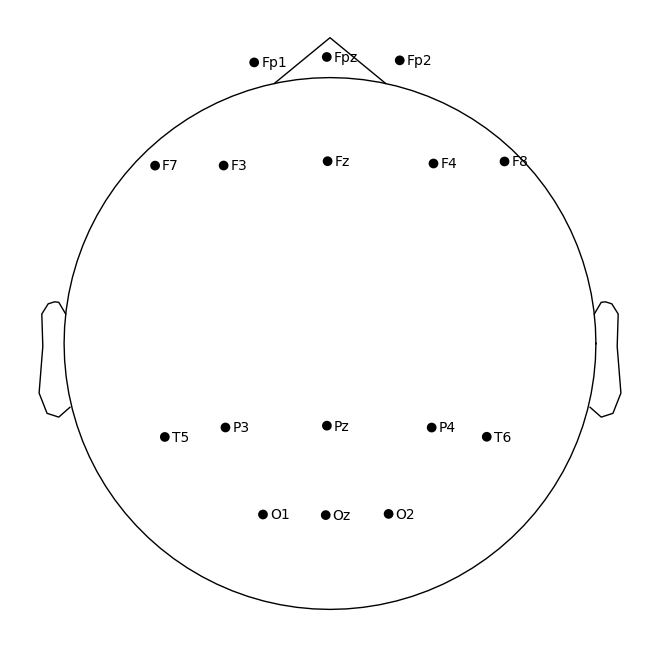

In [18]:
e = mne_raw_S(5).plot_sensors(show_names=True);

In [19]:
e.figure.savefig('scalp.png', dpi=300)

Creating RawArray with float64 data, n_channels=16, n_times=180899
    Range : 0 ... 180898 =      0.000 ...   706.633 secs
Ready.
Effective window size : 8.000 (s)


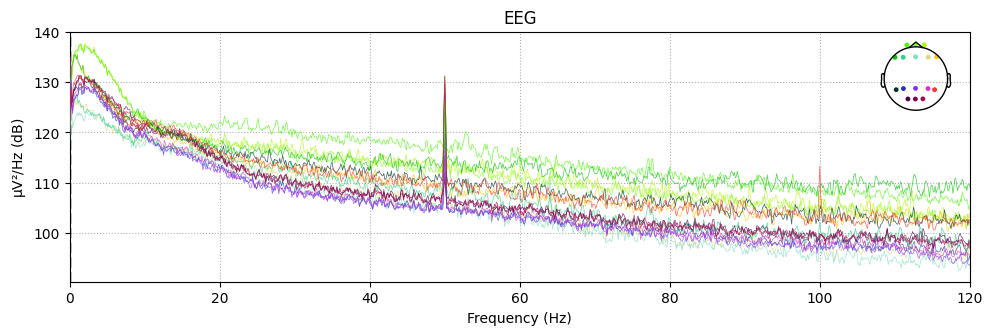

In [20]:
# visualize all PSDs here by changing (S)
mne_raw_S(1).plot_psd(fmin=0, fmax=120);

Creating RawArray with float64 data, n_channels=16, n_times=180899
    Range : 0 ... 180898 =      0.000 ...   706.633 secs
Ready.
Using matplotlib as 2D backend.


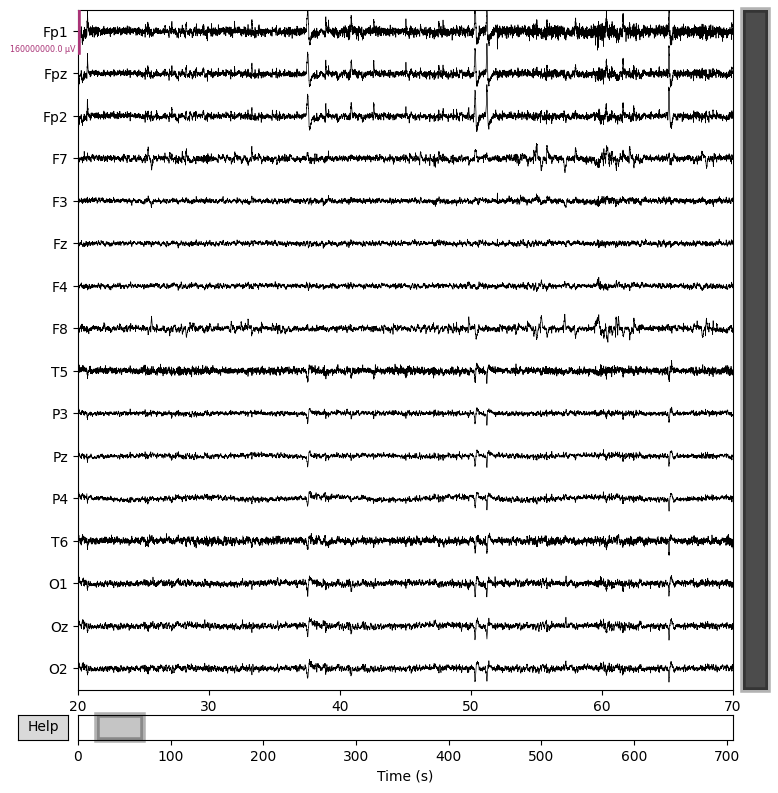

In [21]:
# visualize 16 channels recordings by changing (S)
# (duration and start in sec)

mne_raw_S(1).plot(duration=50, start=20.0, n_channels=16, bgcolor='w', bad_color='lightgray', scalings=80000000e-6, remove_dc=False);

# Pre-processing (Filtering+ICA)

In [22]:
# clean eeg data for subject s (ICA+filtering)
def clean_raw_S (subject) :
  low_cut = 1
  high_cut  = 60
  method = 'fastica'
  n_components = 0.99
  random_state = 8
  ica = ICA(n_components=n_components, method=method, random_state=random_state)

  raw = mne_raw_S(subject).filter(low_cut, high_cut).notch_filter(freqs=50)

  ica.fit(raw)
  ica.exclude = [0]
  ica.apply(raw)

  return raw

Creating RawArray with float64 data, n_channels=16, n_times=180899
    Range : 0 ... 180898 =      0.000 ...   706.633 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 845 samples (3.301 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lo

/usr/local/lib/python3.10/dist-packages/mne/filter.py:1005: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/usr/local/lib/python3.10/dist-packages/mne/filter.py:1005: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/usr/local/lib/python3.10/dist-packages/mne/filter.py:1720: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  l_freq = cast(l_freq)
/

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by explained variance: 10 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 1 ICA component
    Projecting back using 16 PCA components
Effective window size : 8.000 (s)


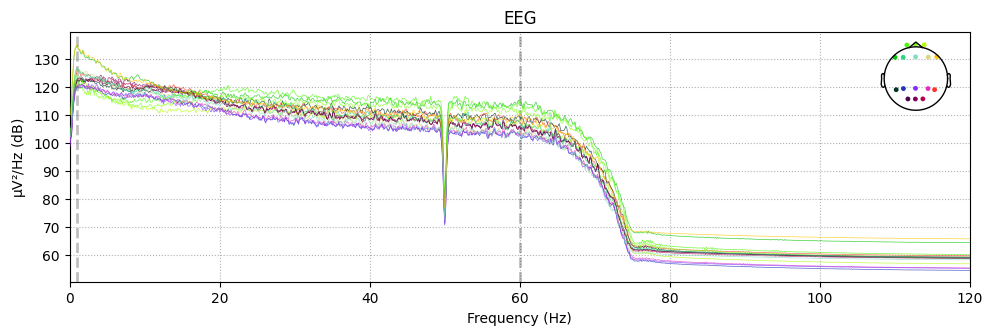

In [23]:
clean_raw_S(1).plot_psd(fmin=0, fmax=120);

Creating RawArray with float64 data, n_channels=16, n_times=180899
    Range : 0 ... 180898 =      0.000 ...   706.633 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 845 samples (3.301 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------


/usr/local/lib/python3.10/dist-packages/mne/filter.py:1005: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/usr/local/lib/python3.10/dist-packages/mne/filter.py:1005: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('Setting up band-pass filter from %0.2g - %0.2g Hz'
/usr/local/lib/python3.10/dist-packages/mne/filter.py:1720: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  l_freq = cast(l_freq)
/

Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Fitting ICA to data using 16 channels (please be patient, this may take a while)


/usr/local/lib/python3.10/dist-packages/mne/filter.py:1768: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('- Lower passband edge: %0.2f' % (l_freq,))
/usr/local/lib/python3.10/dist-packages/mne/filter.py:1769: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  msg += ' (%s cutoff frequency: %0.2f Hz)' % (
/usr/local/lib/python3.10/dist-packages/mne/filter.py:1795: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.info('- Upper passband edge: %0.2f Hz' % (

Selecting by explained variance: 10 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 1 ICA component
    Projecting back using 16 PCA components


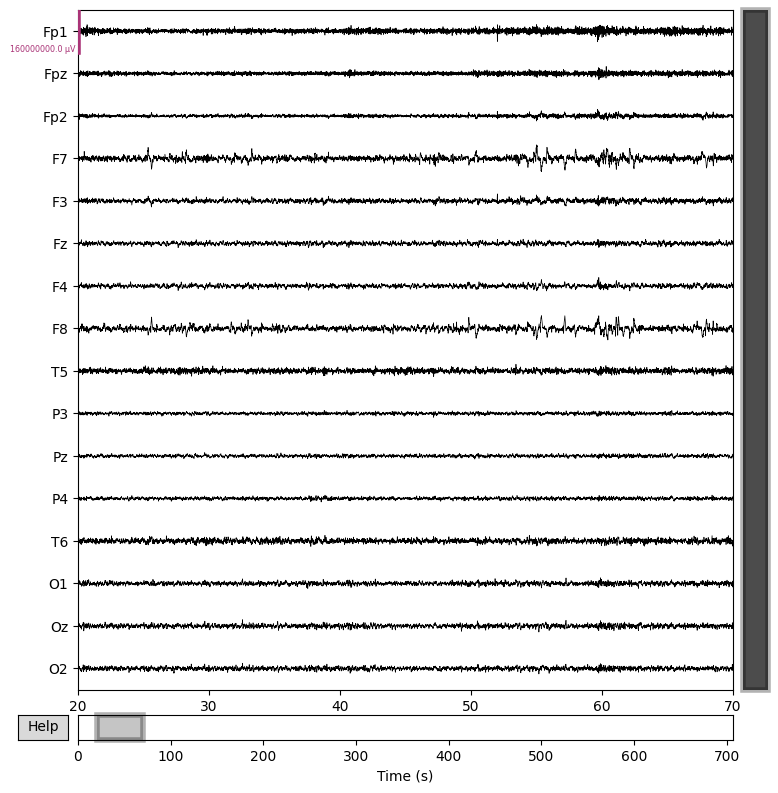

In [24]:
clean_raw_S(1).plot(duration=50, start=20.0, n_channels=16, bgcolor='w', bad_color='lightgray', scalings=80000000e-6, remove_dc=False);

# Compute Mental WorkLoad metric

In [25]:
# compute WL for subject s
def WL_S (subject) :
  epochs = mne.make_fixed_length_epochs(clean_raw_S(subject), duration=5.0, preload=False) # change duration of epochs here to change resolution of computed WL

  psd, freqs = epochs.compute_psd(method='welch', fmin=1, fmax=30, picks='eeg', n_per_seg=256*2, window='hann').get_data(return_freqs=True)
  psd /= np.sum(psd, axis=-1, keepdims=True)

  psd_theta = psd[:, :, (freqs >= 4) & (freqs < 8)].mean(axis=-1)
  psd_alpha = psd[:, :, (freqs >= 8) & (freqs <= 12)].mean(axis=-1)

  psd_theta_front = psd_theta[:, 0:8].mean(axis=-1)
  psd_alpha_pariet = psd_alpha[:, 9:12].mean(axis=-1)

  WL = np.divide(psd_theta_front, psd_alpha_pariet)

  return (WL - np.min(WL)) / (np.max(WL) - np.min(WL))

In [28]:
def plot_WL_S (subject) :
  %matplotlib inline
  fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18,2.5))
  fig.tight_layout()
  i = subject
  plt.title('Evolution of WL metric for subject S' + str(i), fontsize=12)
  aa = sns.heatmap([WL_S(i)], cmap="coolwarm", xticklabels=12, yticklabels=False) # change xticklabels with 60/epoch_duration
  aa.set(xlabel ="minutes")
  aa.set_xticklabels('')
  aa.set_xticklabels(['0', '1','2','3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

  l = [0, lap_length_in_samples(i, 1), lap_length_in_samples(i, 2), lap_length_in_samples(i, 3), lap_length_in_samples(i, 4), lap_length_in_samples(i, 5), lap_length_in_samples(i, 6)]
  b = [l[0], l[1], l[1]+l[2], l[1]+l[2]+l[3], l[1]+l[2]+l[3]+l[4], l[1]+l[2]+l[3]+l[4]+l[5], l[1]+l[2]+l[3]+l[4]+l[5]+l[6]]
  #print(f'\nLAPS began at: L1 : {b[0]/256/60}min, L2 : {b[1]/256/60}min, L3 : {b[2]/256/60}min, L4 : {b[3]/256/60}min, L5 : {b[4]/256/60}min, L6 : {b[5]/256/60}min')

In [31]:
#plot_WL_S(10); # choose subject to visualize heatmap profile of WL on concatenated laps

In [32]:
#df_WL_s10 = pd.DataFrame(WL_S(10), columns=['WL'])

In [ ]:
# df_WL_s10.to_csv("/content/drive/MyDrive/Work/WL_S10_5sec.csv", header=True)

In [ ]:
def WL_boxplot_S (subject) :
  i = subject
  l = [0, lap_length_in_samples(i, 1), lap_length_in_samples(i, 2), lap_length_in_samples(i, 3), lap_length_in_samples(i, 4), lap_length_in_samples(i, 5), lap_length_in_samples(i, 6)]
  ll = [l[0], l[1], l[1]+l[2], l[1]+l[2]+l[3], l[1]+l[2]+l[3]+l[4], l[1]+l[2]+l[3]+l[4]+l[5], l[1]+l[2]+l[3]+l[4]+l[5]+l[6]]
  rez = 5 # 5 sec resolution for computed WL
  u = [int(ll[0]/256/rez), int(ll[1]/256/rez), int(ll[2]/256/rez), int(ll[3]/256/rez), int(ll[4]/256/rez), int(ll[5]/256/rez), int(ll[6]/256/rez)]
  list_arr = [WL_S(subject)[u[0]:u[1]],
              WL_S(subject)[u[1]:u[2]],
              WL_S(subject)[u[2]:u[3]],
              WL_S(subject)[u[3]:u[4]],
              WL_S(subject)[u[4]:u[5]],
              WL_S(subject)[u[5]:u[6]]]

  a = sns.boxplot(data=list_arr)
  a.set_title('Distribution of WL over LAPs for subject S' + str(subject))
  a.set(xlabel ="LAPs")
  a.set_xticklabels('')
  a.set_xticklabels(['L1', 'L2', 'L3', 'L4', 'L5', 'L6'])

In [ ]:
WL_boxplot_S(10) # choose subject to visualize WL distribution boxplots by LAP

# **=================ECG=========================**

# Imports


In [33]:
! pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 10.2 MB/s eta 0:00:00


In [34]:
%matplotlib inline

In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neurokit2 as nk

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load & segment ECG

In [37]:
#raw_data = pd.read_csv("/content/drive/MyDrive/Work/Physio_data_anonyme.csv")
ecg_data = pd.DataFrame.copy(raw_data)
ecg_data = raw_data.drop (['payload.fSample', 'payload.Saw', 'payload.Aux29', 'payload.ExG1', 'payload.ExG2',	'payload.ExG3',	'payload.ExG4',	'payload.ExG5','payload.ExG6',	'payload.ExG7',	'payload.ExG8',	'payload.ExG9',	'payload.ExG10', 'payload.ExG11',	'payload.ExG12',	'payload.ExG13',	'payload.ExG14',	'payload.ExG15',	'payload.ExG16', 'TimeStampss'], axis=1)
ecg_data.rename(columns = {'payload.Bip17': 'ecg'}, inplace = True)

In [38]:
def ecg_S (subject) :
    subject_ecg = ecg_data[ecg_data.personId == "S" + str(subject)]
    subject_ecg = subject_ecg.drop (['personId'], axis=1)
    subject_ecg = subject_ecg.drop (['LAPS'], axis=1)
    return subject_ecg

ecg_S(10)

ecg
1612374 -21.002975
1612375 -26.697200
1612376 -39.291456
1612377 -60.409360
1612378 -80.483278
...            ...
1818032 -58.664934
1818033 -87.461065
1818034 -97.435752
1818035 -69.750603
1818036  -4.068821

[205663 rows x 1 columns]

In [39]:
def segmenter (subject, windowInSecs):
  ecgS = ecg_S(subject).to_numpy()
  ecgS = ecgS[:,0]
  cleaned = nk.ecg_clean(ecgS,sampling_rate=256, method="neurokit")
  peaks, info = nk.ecg_peaks(cleaned, sampling_rate=256, method="zong2003",correct_artifacts=True) # change peak detection algorithm here
  peaksNP = peaks.to_numpy()
  peaksNP = peaksNP[:,0]
  duration_peaks = len(peaksNP)
  divider=duration_peaks/256/windowInSecs
  segment=np.array_split(peaksNP,divider)
  return segment # this is a list of equal window length arrays containing ones (detected peaks) and zeros

# Visual inspection of peaks detection

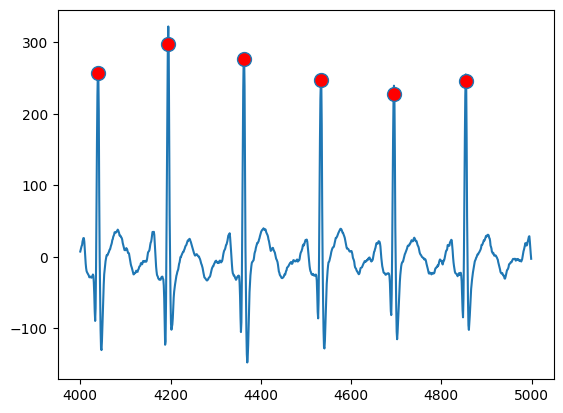

In [40]:
# Visualize peaks detection
subject = 10
window_size = 30
window_segment = 0
start_viz = 4000
end_viz = 5000

x = np.arange(0, len(segmenter(subject, window_size)[window_segment]))
y = ecg_S(subject).to_numpy()[:,0][start_viz:end_viz]
bla = segmenter(subject, window_size)[window_segment][start_viz:end_viz]
plt.plot(x[start_viz:end_viz],y, marker="o", ms = 10, mfc = 'r', markevery = list(np.arange(len(x[start_viz:end_viz]))[bla > 0.5]))
plt.show()

# Compute Ultra Short Term HRV metrics


In [41]:
def hrv_HF (subject, window):

  hrv_HF_np = np.array([])
  for i in range (1,len(segmenter(subject, window))) :
    hrv_freq = nk.hrv_frequency(segmenter(subject, window)[i-1], sampling_rate=256, show=False, normalize=True)
    hrv_HF = hrv_freq [['HRV_HF']].to_numpy()
    hrv_HF_np = np.append(hrv_HF_np, hrv_HF)
  hrv_HF_norm = (hrv_HF_np - np.min(hrv_HF_np)) / (np.max(hrv_HF_np) - np.min(hrv_HF_np))

  return hrv_HF_norm

In [42]:
df = pd.DataFrame(hrv_HF(10, 60)) #choose the subject and the window size
df_HF = pd.DataFrame.transpose (df)
df_HF.index = ['S10'] #change the name of the subject
df_HF.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
df_HF

1         2         3         4         5    6         7  \
S10  0.619961  0.367718  0.399092  0.425175  0.359829  0.0  0.999001   

            8    9        10        11        12  
S10  0.915422  1.0  0.376339  0.046262  0.469155

Text(0.5, 1.0, 'HF for subject 10')

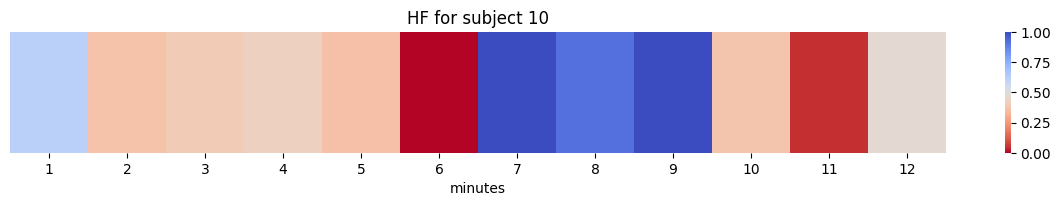

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,1.8))
a = sns.heatmap (df_HF, cmap = 'coolwarm_r', yticklabels=False)
fig.tight_layout()
a.set(xlabel ="minutes")
plt.title('HF for subject 10')

In [44]:
def hrv_RMSSD (subject, window):

  hrv_RMSSD_np = np.array([])
  for i in range (1,len(segmenter(subject, window))) :
    hrv_time = nk.hrv_time(segmenter(subject, window)[i-1], sampling_rate=256, show=False, normalize=True)
    hrv_RMSSD = hrv_time[['HRV_RMSSD']].to_numpy()
    hrv_RMSSD_np = np.append(hrv_RMSSD_np, hrv_RMSSD)
  hrv_RMSSD_norm = (hrv_RMSSD_np - np.min(hrv_RMSSD_np)) / (np.max(hrv_RMSSD_np) - np.min(hrv_RMSSD_np))

  return hrv_RMSSD_norm

In [45]:
df2 = pd.DataFrame(hrv_RMSSD(10,30)) #choose the subject and the window size
df_RMSSD = pd.DataFrame.transpose(df2)
df_RMSSD.index = ['S10']
df_RMSSD.columns = ['30', '60','90','120','150','180','210','240','270','300','330', '360','390','420','450','480','510','540','570','600','630', '660','690','620','650']
df_RMSSD

30   60        90       120       150       180       210  \
S10  0.703452  1.0  0.863714  0.846723  0.325766  0.231425  0.110475   

          240       270       300  ...       480       510       540  \
S10  0.279977  0.105911  0.391819  ...  0.147875  0.541858  0.025327   

          570       600  630       660       690       620       650  
S10  0.389534  0.282859  0.0  0.896198  0.179124  0.066754  0.133563  

[1 rows x 25 columns]

Text(0.5, 1.0, 'RMSSD for subject 10')

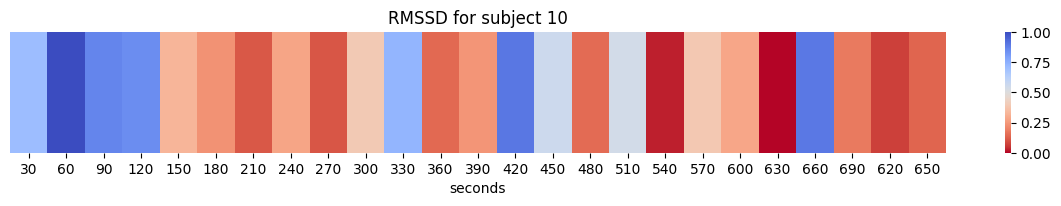

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,1.8))
b = sns.heatmap (df_RMSSD, cmap = 'coolwarm_r', yticklabels=False)
fig.tight_layout()
b.set(xlabel ="seconds")
plt.title('RMSSD for subject 10')

In [47]:
def hrv_MeanNN(subject, window):

  hrv_MeanNN_np = np.array([])
  for i in range (1,len(segmenter(subject, window))) :
    hrv_time = nk.hrv_time(segmenter(subject, window)[i-1], sampling_rate=256, show=False, normalize=True)
    hrv_MeanNN = hrv_time [['HRV_MeanNN']].to_numpy()
    hrv_MeanNN_np = np.append(hrv_MeanNN_np, hrv_MeanNN)
  hrv_MeanNN_norm = (hrv_MeanNN_np - np.min(hrv_MeanNN_np)) / (np.max(hrv_MeanNN_np) - np.min(hrv_MeanNN_np))

  return hrv_MeanNN_norm

In [48]:
df3 = pd.DataFrame(hrv_MeanNN(10, 30))
df_MeanNN = pd.DataFrame.transpose (df3)
df_MeanNN.index = ['S10']
df_MeanNN.columns = ['30', '60','90','120','150','180','210','240','270','300','330', '360','390','420','450','480','510','540','570','600','630', '660','690','620','650']
df_MeanNN

30        60        90       120       150       180       210  \
S10  0.391962  0.246906  0.637331  0.177416  0.329351  0.691448  0.484098   

          240      270       300  ...       480      510       540       570  \
S10  0.573586  0.47005  0.283417  ...  0.127949  0.04505  0.100497  0.295855   

          600       630       660       690       620       650  
S10  0.448425  0.048516  0.041585  0.754018  0.411184  0.437613  

[1 rows x 25 columns]

Text(0.5, 1.0, 'MeanNN for subject 10')

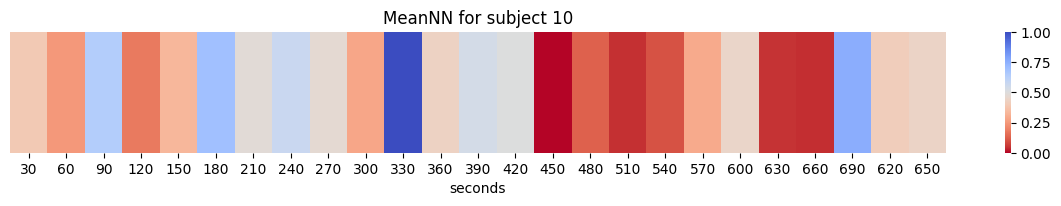

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,1.8))
c = sns.heatmap (df_MeanNN, cmap = 'coolwarm_r', yticklabels=False)
fig.tight_layout()
c.set(xlabel ="seconds")
plt.title('MeanNN for subject 10')

# Data augmentation (Linear interpolation)

In [50]:
from scipy.interpolate import interp1d

In [51]:
df_HF

1         2         3         4         5    6         7  \
S10  0.619961  0.367718  0.399092  0.425175  0.359829  0.0  0.999001   

            8    9        10        11        12  
S10  0.915422  1.0  0.376339  0.046262  0.469155

In [52]:
HF_S10 = df_HF
HF10 = HF_S10.to_numpy()
HF10 = HF10[0,:]
HF10 = HF10[0:12]
add = [0.4691547,0.4691547]
HF10_ = np.append(HF10, add)
x = np.arange(0, 14, 0.08333, dtype=float)
xp = np.arange(0, 14, 1, dtype=int)
y = HF10_
HF10_interp = np.interp(x, xp, y)
HF10_interp = HF10_interp [0:160]
HF10_interp

array([6.19961081e-01, 5.98941631e-01, 5.77922182e-01, 5.56902732e-01,
       5.35883282e-01, 5.14863832e-01, 4.93844383e-01, 4.72824933e-01,
       4.51805483e-01, 4.30786033e-01, 4.09766583e-01, 3.88747134e-01,
       3.67727684e-01, 3.70330752e-01, 3.72945165e-01, 3.75559577e-01,
       3.78173990e-01, 3.80788403e-01, 3.83402815e-01, 3.86017228e-01,
       3.88631641e-01, 3.91246053e-01, 3.93860466e-01, 3.96474879e-01,
       3.99089291e-01, 4.01263269e-01, 4.03436823e-01, 4.05610376e-01,
       4.07783930e-01, 4.09957484e-01, 4.12131038e-01, 4.14304592e-01,
       4.16478146e-01, 4.18651700e-01, 4.20825254e-01, 4.22998807e-01,
       4.25172361e-01, 4.19738039e-01, 4.14292745e-01, 4.08847451e-01,
       4.03402157e-01, 3.97956863e-01, 3.92511569e-01, 3.87066275e-01,
       3.81620981e-01, 3.76175688e-01, 3.70730394e-01, 3.65285100e-01,
       3.59839806e-01, 3.29902343e-01, 2.99917764e-01, 2.69933184e-01,
       2.39948604e-01, 2.09964024e-01, 1.79979444e-01, 1.49994865e-01,
      

In [53]:
df_RMSSD

30   60        90       120       150       180       210  \
S10  0.703452  1.0  0.863714  0.846723  0.325766  0.231425  0.110475   

          240       270       300  ...       480       510       540  \
S10  0.279977  0.105911  0.391819  ...  0.147875  0.541858  0.025327   

          570       600  630       660       690       620       650  
S10  0.389534  0.282859  0.0  0.896198  0.179124  0.066754  0.133563  

[1 rows x 25 columns]

In [54]:
RMSSD_S10 = df_RMSSD
RMSSD10 = RMSSD_S10.to_numpy()
RMSSD10 = RMSSD10[0,:]
RMSSD10 = RMSSD10[0:25]
add2 = [0.133563, 0.133563, 0.133563]
RMSSD10_ = np.append(RMSSD10, add2)
x2 = np.arange(0, 14, 0.08333, dtype=float)
xp2 = np.arange(0, 14, 0.5, dtype=float)
y2 = RMSSD10_
RMSSD10_interp = np.interp(x2, xp2, y2)
RMSSD10_interp = RMSSD10_interp [0:160]
RMSSD10_interp

array([7.03452451e-01, 7.52875065e-01, 8.02297680e-01, 8.51720295e-01,
       9.01142909e-01, 9.50565524e-01, 9.99988138e-01, 9.77292071e-01,
       9.54578691e-01, 9.31865311e-01, 9.09151930e-01, 8.86438550e-01,
       8.63725170e-01, 8.60883838e-01, 8.58052050e-01, 8.55220261e-01,
       8.52388473e-01, 8.49556684e-01, 8.46724896e-01, 7.59962756e-01,
       6.73140140e-01, 5.86317524e-01, 4.99494909e-01, 4.12672293e-01,
       3.25849677e-01, 3.10058473e-01, 2.94335528e-01, 2.78612582e-01,
       2.62889636e-01, 2.47166691e-01, 2.31443745e-01, 2.11291636e-01,
       1.91134205e-01, 1.70976774e-01, 1.50819343e-01, 1.30661912e-01,
       1.10504481e-01, 1.38683837e-01, 1.66932900e-01, 1.95181964e-01,
       2.23431027e-01, 2.51680091e-01, 2.79929154e-01, 2.51015577e-01,
       2.22005800e-01, 1.92996024e-01, 1.63986247e-01, 1.34976471e-01,
       1.05966694e-01, 1.53468953e-01, 2.01118403e-01, 2.48767853e-01,
       2.96417304e-01, 3.44066754e-01, 3.91716204e-01, 4.48449282e-01,
      

In [55]:
df_MeanNN

30        60        90       120       150       180       210  \
S10  0.391962  0.246906  0.637331  0.177416  0.329351  0.691448  0.484098   

          240      270       300  ...       480      510       540       570  \
S10  0.573586  0.47005  0.283417  ...  0.127949  0.04505  0.100497  0.295855   

          600       630       660       690       620       650  
S10  0.448425  0.048516  0.041585  0.754018  0.411184  0.437613  

[1 rows x 25 columns]

In [56]:
MeanNN_S10 = df_MeanNN
MeanNN10 = MeanNN_S10.to_numpy()
MeanNN10 = MeanNN10[0,:]
MeanNN10 = MeanNN10[0:25]
add3 = [0.437613, 0.437613, 0.437613]
MeanNN10_ = np.append(MeanNN10, add3)
x3 = np.arange(0, 14, 0.08333, dtype=float)
xp3 = np.arange(0, 14, 0.5, dtype=float)
y3 = MeanNN10_
MeanNN10_interp = np.interp(x3, xp3,y3)
MeanNN10_interp = MeanNN10_interp[0:160]
MeanNN10_interp

array([3.91962232e-01, 3.67787092e-01, 3.43611953e-01, 3.19436813e-01,
       2.95261674e-01, 2.71086534e-01, 2.46911395e-01, 3.11958278e-01,
       3.77026579e-01, 4.42094881e-01, 5.07163183e-01, 5.72231485e-01,
       6.37299787e-01, 5.60718372e-01, 4.84068930e-01, 4.07419488e-01,
       3.30770046e-01, 2.54120604e-01, 1.77471161e-01, 2.02719216e-01,
       2.28040692e-01, 2.53362168e-01, 2.78683644e-01, 3.04005120e-01,
       3.29326596e-01, 3.89640035e-01, 4.49987099e-01, 5.10334163e-01,
       5.70681228e-01, 6.31028292e-01, 6.91375357e-01, 6.56932351e-01,
       6.22375457e-01, 5.87818562e-01, 5.53261667e-01, 5.18704773e-01,
       4.84147878e-01, 4.98990710e-01, 5.13904783e-01, 5.28818856e-01,
       5.43732929e-01, 5.58647002e-01, 5.73561075e-01, 5.56359744e-01,
       5.39104366e-01, 5.21848987e-01, 5.04593609e-01, 4.87338231e-01,
       4.70082853e-01, 4.39005249e-01, 4.07901055e-01, 3.76796860e-01,
       3.45692665e-01, 3.14588471e-01, 2.83484276e-01, 4.02584827e-01,
      

In [57]:
hrvS10 = [[list(HF10_interp)], [list(RMSSD10_interp)], [list(MeanNN10_interp)]]
df_m = pd.DataFrame(MeanNN10_interp, columns=['MeanNN'])
df_r = pd.DataFrame(RMSSD10_interp, columns=['RMSSD'])
df_h = pd.DataFrame(HF10_interp, columns=['HF'])
df_HRV_S10 = pd.concat([df_h, df_m, df_r], axis=1)
df_HRV_S10

HF    MeanNN     RMSSD
0    0.619961  0.391962  0.703452
1    0.598942  0.367787  0.752875
2    0.577922  0.343612  0.802298
3    0.556903  0.319437  0.851720
4    0.535883  0.295262  0.901143
..        ...       ...       ...
155  0.469155  0.437613  0.133563
156  0.469155  0.437613  0.133563
157  0.469155  0.437613  0.133563
158  0.469155  0.437613  0.133563
159  0.469155  0.437613  0.133563

[160 rows x 3 columns]

In [59]:
#df_S10_5s = pd.concat([df_WL_s10, df_HRV_S10], axis=1)
#df_S10_5s

In [60]:
#plt.plot(df_S10_5s['WL'])

In [ ]:
df_S10_5s.to_csv("/content/drive/MyDrive/Work/S10_5s.csv", header=True)

# **===================TICC=============================**

# TICC solver

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%writefile admm_solver.py

import numpy
import math


class ADMMSolver:
    def __init__(self, lamb, num_stacked, size_blocks, rho, S, rho_update_func=None):
        self.lamb = lamb
        self.numBlocks = num_stacked
        self.sizeBlocks = size_blocks
        probSize = num_stacked*size_blocks
        self.length = int(probSize*(probSize+1)/2)
        self.x = numpy.zeros(self.length)
        self.z = numpy.zeros(self.length)
        self.u = numpy.zeros(self.length)
        self.rho = float(rho)
        self.S = S
        self.status = 'initialized'
        self.rho_update_func = rho_update_func

    def ij2symmetric(self, i,j,size):
        return (size * (size + 1))/2 - (size-i)*((size - i + 1))/2 + j - i

    def upper2Full(self, a):
        n = int((-1  + numpy.sqrt(1+ 8*a.shape[0]))/2)
        A = numpy.zeros([n,n])
        A[numpy.triu_indices(n)] = a
        temp = A.diagonal()
        A = (A + A.T) - numpy.diag(temp)
        return A

    def Prox_logdet(self, S, A, eta):
        d, q = numpy.linalg.eigh(eta*A-S)
        q = numpy.matrix(q)
        X_var = ( 1/(2*float(eta)) )*q*( numpy.diag(d + numpy.sqrt(numpy.square(d) + (4*eta)*numpy.ones(d.shape))) )*q.T
        x_var = X_var[numpy.triu_indices(S.shape[1])] # extract upper triangular part as update variable
        return numpy.matrix(x_var).T

    def ADMM_x(self):
        a = self.z-self.u
        A = self.upper2Full(a)
        eta = 1/self.rho
        x_update = self.Prox_logdet(self.S, A, eta)
        self.x = numpy.array(x_update).T.reshape(-1)

    def ADMM_z(self, index_penalty = 1):
        a = self.x + self.u
        probSize = self.numBlocks*self.sizeBlocks
        z_update = numpy.zeros(self.length)

        # TODO: can we parallelize these?
        for i in range(self.numBlocks):
            elems = self.numBlocks if i==0 else (2*self.numBlocks - 2*i)/2 # i=0 is diagonal
            for j in range(self.sizeBlocks):
                startPoint = j if i==0 else 0
                for k in range(startPoint, self.sizeBlocks):
                    locList = [((l+i)*self.sizeBlocks + j, l*self.sizeBlocks+k) for l in range(int(elems))]
                    if i == 0:
                        lamSum = sum(self.lamb[loc1, loc2] for (loc1, loc2) in locList)
                        indices = [self.ij2symmetric(loc1, loc2, probSize) for (loc1, loc2) in locList]
                    else:
                        lamSum = sum(self.lamb[loc2, loc1] for (loc1, loc2) in locList)
                        indices = [self.ij2symmetric(loc2, loc1, probSize) for (loc1, loc2) in locList]
                    pointSum = sum(a[int(index)] for index in indices)
                    rhoPointSum = self.rho * pointSum

                    # Calculate soft threshold
                    ans = 0
                    # If answer is positive
                    if rhoPointSum > lamSum:
                        ans = max((rhoPointSum - lamSum)/(self.rho*elems),0)
                    elif rhoPointSum < -1*lamSum:
                        ans = min((rhoPointSum + lamSum)/(self.rho*elems),0)

                    for index in indices:
                        z_update[int(index)] = ans
        self.z = z_update

    def ADMM_u(self):
        u_update = self.u + self.x - self.z
        self.u = u_update

    # Returns True if convergence criteria have been satisfied
    # eps_abs = eps_rel = 0.01
    # r = x - z
    # s = rho * (z - z_old)
    # e_pri = sqrt(length) * e_abs + e_rel * max(||x||, ||z||)
    # e_dual = sqrt(length) * e_abs + e_rel * ||rho * u||
    # Should stop if (||r|| <= e_pri) and (||s|| <= e_dual)
    # Returns (boolean shouldStop, primal residual value, primal threshold,
    #          dual residual value, dual threshold)
    def CheckConvergence(self, z_old, e_abs, e_rel, verbose):
        norm = numpy.linalg.norm
        r = self.x - self.z
        s = self.rho * (self.z - z_old)
        # Primal and dual thresholds. Add .0001 to prevent the case of 0.
        e_pri = math.sqrt(self.length) * e_abs + e_rel * max(norm(self.x), norm(self.z)) + .0001
        e_dual = math.sqrt(self.length) * e_abs + e_rel * norm(self.rho * self.u) + .0001
        # Primal and dual residuals
        res_pri = norm(r)
        res_dual = norm(s)
        if verbose:
            # Debugging information to print(convergence criteria values)
            print('  r:', res_pri)
            print('  e_pri:', e_pri)
            print('  s:', res_dual)
            print('  e_dual:', e_dual)
        stop = (res_pri <= e_pri) and (res_dual <= e_dual)
        return (stop, res_pri, e_pri, res_dual, e_dual)

    #solve
    def __call__(self, maxIters, eps_abs, eps_rel, verbose):
        num_iterations = 0
        self.status = 'Incomplete: max iterations reached'
        for i in range(maxIters):
            z_old = numpy.copy(self.z)
            self.ADMM_x()
            self.ADMM_z()
            self.ADMM_u()
            if i != 0:
                stop, res_pri, e_pri, res_dual, e_dual = self.CheckConvergence(z_old, eps_abs, eps_rel, verbose)
                if stop:
                    self.status = 'Optimal'
                    break
                new_rho = self.rho
                if self.rho_update_func:
                    new_rho = self.rho_update_func(self.rho, res_pri, e_pri, res_dual, e_dual)
                scale = self.rho / new_rho
                rho = new_rho
                self.u = scale*self.u
            if verbose:
                # Debugging information prints current iteration #
                print('Iteration %d' % i)
        return self.x


Writing admm_solver.py


In [ ]:
%%writefile TICC_helper.py

import numpy as np


def getTrainTestSplit(m, num_blocks, num_stacked):
    '''
    - m: number of observations
    - num_blocks: window_size + 1
    - num_stacked: window_size
    Returns:
    - sorted list of training indices
    '''
    # Now splitting up stuff
    # split1 : Training and Test
    # split2 : Training and Test - different clusters
    training_percent = 1
    # list of training indices
    training_idx = np.random.choice(
        m - num_blocks + 1, size=int((m - num_stacked) * training_percent), replace=False)
    # Ensure that the first and the last few points are in
    training_idx = list(training_idx)
    if 0 not in training_idx:
        training_idx.append(0)
    if m - num_stacked not in training_idx:
        training_idx.append(m - num_stacked)
    training_idx = np.array(training_idx)
    return sorted(training_idx)


def upperToFull(a, eps=0):
    ind = (a < eps) & (a > -eps)
    a[ind] = 0
    n = int((-1 + np.sqrt(1 + 8 * a.shape[0])) / 2)
    A = np.zeros([n, n])
    A[np.triu_indices(n)] = a
    temp = A.diagonal()
    A = np.asarray((A + A.T) - np.diag(temp))
    return A


def hex_to_rgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    lv = len(value)
    out = tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    out = tuple([x / 256.0 for x in out])
    return out


def updateClusters(LLE_node_vals, switch_penalty=1):
    """
    Takes in LLE_node_vals matrix and computes the path that minimizes
    the total cost over the path
    Note the LLE's are negative of the true LLE's actually!!!!!

    Note: switch penalty > 0
    """
    (T, num_clusters) = LLE_node_vals.shape
    future_cost_vals = np.zeros(LLE_node_vals.shape)

    # compute future costs
    for i in range(T - 2, -1, -1):
        j = i + 1
        indicator = np.zeros(num_clusters)
        future_costs = future_cost_vals[j, :]
        lle_vals = LLE_node_vals[j, :]
        for cluster in range(num_clusters):
            total_vals = future_costs + lle_vals + switch_penalty
            total_vals[cluster] -= switch_penalty
            future_cost_vals[i, cluster] = np.min(total_vals)

    # compute the best path
    path = np.zeros(T)

    # the first location
    curr_location = np.argmin(future_cost_vals[0, :] + LLE_node_vals[0, :])
    path[0] = curr_location

    # compute the path
    for i in range(T - 1):
        j = i + 1
        future_costs = future_cost_vals[j, :]
        lle_vals = LLE_node_vals[j, :]
        total_vals = future_costs + lle_vals + switch_penalty
        total_vals[int(path[i])] -= switch_penalty

        path[i + 1] = np.argmin(total_vals)

    # return the computed path
    return path


def find_matching(confusion_matrix):
    """
    returns the perfect matching
    """
    _, n = confusion_matrix.shape
    path = []
    for i in range(n):
        max_val = -1e10
        max_ind = -1
        for j in range(n):
            if j in path:
                pass
            else:
                temp = confusion_matrix[i, j]
                if temp > max_val:
                    max_val = temp
                    max_ind = j
        path.append(max_ind)
    return path


def computeF1Score_delete(num_cluster, matching_algo, actual_clusters, threshold_algo, save_matrix=False):
    """
    computes the F1 scores and returns a list of values
    """
    F1_score = np.zeros(num_cluster)
    for cluster in range(num_cluster):
        matched_cluster = matching_algo[cluster]
        true_matrix = actual_clusters[cluster]
        estimated_matrix = threshold_algo[matched_cluster]
        if save_matrix: np.savetxt("estimated_matrix_cluster=" + str(
            cluster) + ".csv", estimated_matrix, delimiter=",", fmt="%1.4f")
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for i in range(num_stacked * n):
            for j in range(num_stacked * n):
                if estimated_matrix[i, j] == 1 and true_matrix[i, j] != 0:
                    TP += 1.0
                elif estimated_matrix[i, j] == 0 and true_matrix[i, j] == 0:
                    TN += 1.0
                elif estimated_matrix[i, j] == 1 and true_matrix[i, j] == 0:
                    FP += 1.0
                else:
                    FN += 1.0
        precision = (TP) / (TP + FP)
        print("cluster #", cluster)
        print("TP,TN,FP,FN---------->", (TP, TN, FP, FN))
        recall = TP / (TP + FN)
        f1 = (2 * precision * recall) / (precision + recall)
        F1_score[cluster] = f1
    return F1_score


def compute_confusion_matrix(num_clusters, clustered_points_algo, sorted_indices_algo):
    """
    computes a confusion matrix and returns it
    """
    seg_len = 400
    true_confusion_matrix = np.zeros([num_clusters, num_clusters])
    for point in range(len(clustered_points_algo)):
        cluster = clustered_points_algo[point]
        num = (int(sorted_indices_algo[point] / seg_len) % num_clusters)
        true_confusion_matrix[int(num), int(cluster)] += 1
    return true_confusion_matrix


def computeF1_macro(confusion_matrix, matching, num_clusters):
    """
    computes the macro F1 score
    confusion matrix : requres permutation
    matching according to which matrix must be permuted
    """
    # Permute the matrix columns
    permuted_confusion_matrix = np.zeros([num_clusters, num_clusters])
    for cluster in range(num_clusters):
        matched_cluster = matching[cluster]
        permuted_confusion_matrix[:, cluster] = confusion_matrix[:, matched_cluster]
    # Compute the F1 score for every cluster
    F1_score = 0
    for cluster in range(num_clusters):
        TP = permuted_confusion_matrix[cluster, cluster]
        FP = np.sum(permuted_confusion_matrix[:, cluster]) - TP
        FN = np.sum(permuted_confusion_matrix[cluster, :]) - TP
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = stats.hmean([precision, recall])
        F1_score += f1
    F1_score /= num_clusters
    return F1_score


def computeBIC(K, T, clustered_points, inverse_covariances, empirical_covariances):
    '''
    empirical covariance and inverse_covariance should be dicts
    K is num clusters
    T is num samples
    '''
    mod_lle = 0

    threshold = 2e-5
    clusterParams = {}
    for cluster, clusterInverse in inverse_covariances.items():
        mod_lle += np.log(np.linalg.det(clusterInverse)) - np.trace(
            np.dot(empirical_covariances[cluster], clusterInverse))
        clusterParams[cluster] = np.sum(np.abs(clusterInverse) > threshold)
    curr_val = -1
    non_zero_params = 0
    for val in clustered_points:
        if val != curr_val:
            non_zero_params += clusterParams[val]
            curr_val = val
    return non_zero_params * np.log(T) - 2 * mod_lle


Writing TICC_helper.py


In [ ]:
def create_results_folder(path='./RESULTS_LAP26'):

    try:
        os.mkdir(path)
    except OSError:
        print('Error creating foler in {}'.format(path))
    else:
        print('Success creating folder')

def create_driver_folder(path,driver_id):

    path_drv=path+'/'+driver_id

    try:
        os.mkdir(path_drv)
    except OSError:
        print('Error creating foler in {}'.format(path_drv))
    else:
        print('Success creating folder')



def scale_data(df, f):

    f#=['AT', 'Velocity', 'AccelNcomp', 'Curvature', 'guidon','xsens-Rx','xsens-Rz', 'xsens-EulerX','W']

    test=df.copy(deep=True)

    for feature in f:

        mean=df[feature].mean()
        mini=df[feature].min()
        maxi=df[feature].max()

        test[feature]=(test[feature]-mean)/(maxi-mini)

    return test

def prepare_data (df,features,file_name='Ticc_data.txt'):

    test=df[features].copy()
    extract_data=np.array(test)
    np.savetxt(file_name, extract_data, delimiter=',')
    print('Saving Done')

def train_model(classes_nb=5,lambda_parameter=5e-3,beta=0,maxIters=30,threshold=1e-6,window_size=10,file_name='Ticc_data.txt'):

    ticc = TICC(window_size=window_size, number_of_clusters=classes_nb,
                lambda_parameter=lambda_parameter, beta=beta,
                maxIters=maxIters, threshold=threshold,
                write_out_file=False, prefix_string='output_folder/',
                num_proc=2, compute_BIC=False)
    (labels, ticc_MRFS) = ticc.fit(input_file=file_name)

    return(labels,ticc_MRFS)



def save_results(path,driver_id,labels_all,MRFS_all,lambd,beta,n_class,w,features,index=''):

    path_drv=path+'/'+driver_id
    path_lab=path_drv+'/'+'LABELS'+'_'+str(lambd)+'_'+str(beta)+'_'+str(n_class)+'_'+str(w)+index
    path_mrfs=path_drv+'/'+'MRFS'+'_'+str(lambd)+'_'+str(beta)+'_'+str(n_class)+'_'+str(w)+index
    path_feat=path_drv+'/'+'FEATURES'+'_'+str(lambd)+'_'+str(beta)+'_'+str(n_class)+'_'+str(w)+index

    file=open(path_feat+'.txt',"w+")
    for L in features:
        file.writelines(L)

    file.close()

    try:
        os.mkdir(path_lab)
    except OSError:
        print('Error creating foler in {}'.format(path_lab))

    try:
        os.mkdir(path_mrfs)
    except OSError:
        print('Error creating foler in {}'.format(path_mrfs))



    for i in range(len(dfs)) :
        path_lab_lap=path_lab+'/lap'+str(i)+'.csv'
        new_df=dfs[i].iloc[WINDOW-1:].copy()
        new_df['labels']=labels_all[i]
        new_df.to_csv(path_lab_lap,index=False)

        #Loop acrross
        for i in range(len(MRFS_all)):

            #Loop acrros classes
            for j in range(len(MRFS_all[0])):

                path_mrf_lap=path_mrfs+'/lap'+str(i)+'class'+str(j)
                m=MRFS_all[i][j]
                np.save(path_mrf_lap,m)



In [ ]:
%%writefile TICC_solver.py

import numpy as np
import math
import time
import collections
import os
import errno
import sys
import code
import random
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('Agg')
from sklearn import mixture
from sklearn.cluster import KMeans
import pandas as pd
from multiprocessing import Pool

from TICC_helper import *
from admm_solver import ADMMSolver


class TICC:
    def __init__(self, window_size=10, number_of_clusters=5, lambda_parameter=11e-2,
                 beta=400, maxIters=1000, threshold=2e-5, write_out_file=False,
                 prefix_string="", num_proc=1, compute_BIC=False, cluster_reassignment=20):
        """
        Parameters:
            - window_size: size of the sliding window
            - number_of_clusters: number of clusters
            - lambda_parameter: sparsity parameter
            - switch_penalty: temporal consistency parameter
            - maxIters: number of iterations
            - threshold: convergence threshold
            - write_out_file: (bool) if true, prefix_string is output file dir
            - prefix_string: output directory if necessary
            - cluster_reassignment: number of points to reassign to a 0 cluster
        """
        self.window_size = window_size
        self.number_of_clusters = number_of_clusters
        self.lambda_parameter = lambda_parameter
        self.switch_penalty = beta
        self.maxIters = maxIters
        self.threshold = threshold
        self.write_out_file = write_out_file
        self.prefix_string = prefix_string
        self.num_proc = num_proc
        self.compute_BIC = compute_BIC
        self.cluster_reassignment = cluster_reassignment
        self.num_blocks = self.window_size + 1
        pd.set_option('display.max_columns', 500)
        np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
        np.random.seed(102)

    def fit(self, input_file):
        """
        Main method for TICC solver.
        Parameters:
            - input_file: location of the data file
        """
        assert self.maxIters > 0  # must have at least one iteration
        self.log_parameters()

        # Get data into proper format
        times_series_arr, time_series_rows_size, time_series_col_size = self.load_data(input_file)

        ############
        # The basic folder to be created
        str_NULL = self.prepare_out_directory()

        # Train test split
        training_indices = getTrainTestSplit(time_series_rows_size, self.num_blocks,
                                             self.window_size)  # indices of the training samples
        num_train_points = len(training_indices)

        # Stack the training data
        complete_D_train = self.stack_training_data(times_series_arr, time_series_col_size, num_train_points,
                                                    training_indices)

        # Initialization
        # Gaussian Mixture
        gmm = mixture.GaussianMixture(n_components=self.number_of_clusters, covariance_type="full")
        gmm.fit(complete_D_train)
        clustered_points = gmm.predict(complete_D_train)
        gmm_clustered_pts = clustered_points + 0
        # K-means
        kmeans = KMeans(n_clusters=self.number_of_clusters, random_state=0).fit(complete_D_train)
        clustered_points_kmeans = kmeans.labels_  # todo, is there a difference between these two?
        kmeans_clustered_pts = kmeans.labels_

        train_cluster_inverse = {}
        log_det_values = {}  # log dets of the thetas
        computed_covariance = {}
        cluster_mean_info = {}
        cluster_mean_stacked_info = {}
        old_clustered_points = None  # points from last iteration

        empirical_covariances = {}

        # PERFORM TRAINING ITERATIONS
        pool = Pool(processes=self.num_proc)  # multi-threading
        for iters in range(self.maxIters):
            # print(("\n\n\nITERATION ###", iters))
            # Get the train and test points
            train_clusters_arr = collections.defaultdict(list)  # {cluster: [point indices]}
            for point, cluster_num in enumerate(clustered_points):
                train_clusters_arr[cluster_num].append(point)

            len_train_clusters = {k: len(train_clusters_arr[k]) for k in range(self.number_of_clusters)}

            # train_clusters holds the indices in complete_D_train
            # for each of the clusters
            opt_res = self.train_clusters(cluster_mean_info, cluster_mean_stacked_info, complete_D_train,
                                          empirical_covariances, len_train_clusters, time_series_col_size, pool,
                                          train_clusters_arr)

            self.optimize_clusters(computed_covariance, len_train_clusters, log_det_values, opt_res,
                                   train_cluster_inverse)

            # update old computed covariance
            old_computed_covariance = computed_covariance

            # print("UPDATED THE OLD COVARIANCE")

            self.trained_model = {'cluster_mean_info': cluster_mean_info,
                                  'computed_covariance': computed_covariance,
                                  'cluster_mean_stacked_info': cluster_mean_stacked_info,
                                  'complete_D_train': complete_D_train,
                                  'time_series_col_size': time_series_col_size}
            clustered_points = self.predict_clusters()

            # recalculate lengths
            new_train_clusters = collections.defaultdict(list)  # {cluster: [point indices]}
            for point, cluster in enumerate(clustered_points):
                new_train_clusters[cluster].append(point)

            len_new_train_clusters = {k: len(new_train_clusters[k]) for k in range(self.number_of_clusters)}

            before_empty_cluster_assign = clustered_points.copy()

            if iters != 0:
                cluster_norms = [(np.linalg.norm(old_computed_covariance[self.number_of_clusters, i]), i) for i in
                                 range(self.number_of_clusters)]
                norms_sorted = sorted(cluster_norms, reverse=True)
                # clusters that are not 0 as sorted by norm
                valid_clusters = [cp[1] for cp in norms_sorted if len_new_train_clusters[cp[1]] != 0]

                # Add a point to the empty clusters
                # assuming more non empty clusters than empty ones
                counter = 0
                for cluster_num in range(self.number_of_clusters):
                    if len_new_train_clusters[cluster_num] == 0:
                        cluster_selected = valid_clusters[counter]  # a cluster that is not len 0
                        counter = (counter + 1) % len(valid_clusters)
                        # print(("cluster that is zero is:", cluster_num, "selected cluster instead is:", cluster_selected))
                        start_point = np.random.choice(
                            new_train_clusters[cluster_selected])  # random point number from that cluster
                        for i in range(0, self.cluster_reassignment):
                            # put cluster_reassignment points from point_num in this cluster
                            point_to_move = start_point + i
                            if point_to_move >= len(clustered_points):
                                break
                            clustered_points[point_to_move] = cluster_num
                            computed_covariance[self.number_of_clusters, cluster_num] = old_computed_covariance[
                                self.number_of_clusters, cluster_selected]
                            cluster_mean_stacked_info[self.number_of_clusters, cluster_num] = complete_D_train[
                                                                                              point_to_move, :]
                            cluster_mean_info[self.number_of_clusters, cluster_num] \
                                = complete_D_train[point_to_move, :][
                                  (self.window_size - 1) * time_series_col_size:self.window_size * time_series_col_size]

            # for cluster_num in range(self.number_of_clusters):
            # print(("length of cluster #", cluster_num, "-------->", sum([x == cluster_num for x in clustered_points])))

            self.write_plot(clustered_points, str_NULL, training_indices)

            # TEST SETS STUFF
            # LLE + swtiching_penalty
            # Segment length
            # Create the F1 score from the graphs from k-means and GMM
            # Get the train and test points
            train_confusion_matrix_EM = compute_confusion_matrix(self.number_of_clusters, clustered_points,
                                                                 training_indices)
            train_confusion_matrix_GMM = compute_confusion_matrix(self.number_of_clusters, gmm_clustered_pts,
                                                                  training_indices)
            train_confusion_matrix_kmeans = compute_confusion_matrix(self.number_of_clusters, kmeans_clustered_pts,
                                                                     training_indices)
            ###compute the matchings
            matching_EM, matching_GMM, matching_Kmeans = self.compute_matches(train_confusion_matrix_EM,
                                                                              train_confusion_matrix_GMM,
                                                                              train_confusion_matrix_kmeans)

            # print("\n\n\n")

            if np.array_equal(old_clustered_points, clustered_points):
                # print("\n\n\n\nCONVERGED!!! BREAKING EARLY!!!")
                break
            old_clustered_points = before_empty_cluster_assign
            # end of training
        if pool is not None:
            pool.close()
            pool.join()
        train_confusion_matrix_EM = compute_confusion_matrix(self.number_of_clusters, clustered_points,
                                                             training_indices)
        train_confusion_matrix_GMM = compute_confusion_matrix(self.number_of_clusters, gmm_clustered_pts,
                                                              training_indices)
        train_confusion_matrix_kmeans = compute_confusion_matrix(self.number_of_clusters, clustered_points_kmeans,
                                                                 training_indices)

        self.compute_f_score(matching_EM, matching_GMM, matching_Kmeans, train_confusion_matrix_EM,
                             train_confusion_matrix_GMM, train_confusion_matrix_kmeans)

        if self.compute_BIC:
            bic = computeBIC(self.number_of_clusters, time_series_rows_size, clustered_points, train_cluster_inverse,
                             empirical_covariances)
            return clustered_points, train_cluster_inverse, bic

        return clustered_points, train_cluster_inverse

    def compute_f_score(self, matching_EM, matching_GMM, matching_Kmeans, train_confusion_matrix_EM,
                        train_confusion_matrix_GMM, train_confusion_matrix_kmeans):
        f1_EM_tr = -1  # computeF1_macro(train_confusion_matrix_EM,matching_EM,num_clusters)
        f1_GMM_tr = -1  # computeF1_macro(train_confusion_matrix_GMM,matching_GMM,num_clusters)
        f1_kmeans_tr = -1  # computeF1_macro(train_confusion_matrix_kmeans,matching_Kmeans,num_clusters)
        print("\n\n")
        print(("TRAINING F1 score:", f1_EM_tr, f1_GMM_tr, f1_kmeans_tr))
        correct_e_m = 0
        correct_g_m_m = 0
        correct_k_means = 0
        for cluster in range(self.number_of_clusters):
            matched_cluster__e_m = matching_EM[cluster]
            matched_cluster__g_m_m = matching_GMM[cluster]
            matched_cluster__k_means = matching_Kmeans[cluster]

            correct_e_m += train_confusion_matrix_EM[cluster, matched_cluster__e_m]
            correct_g_m_m += train_confusion_matrix_GMM[cluster, matched_cluster__g_m_m]
            correct_k_means += train_confusion_matrix_kmeans[cluster, matched_cluster__k_means]

    def compute_matches(self, train_confusion_matrix_EM, train_confusion_matrix_GMM, train_confusion_matrix_kmeans):
        matching_Kmeans = find_matching(train_confusion_matrix_kmeans)
        matching_GMM = find_matching(train_confusion_matrix_GMM)
        matching_EM = find_matching(train_confusion_matrix_EM)
        correct_e_m = 0
        correct_g_m_m = 0
        correct_k_means = 0
        for cluster in range(self.number_of_clusters):
            matched_cluster_e_m = matching_EM[cluster]
            matched_cluster_g_m_m = matching_GMM[cluster]
            matched_cluster_k_means = matching_Kmeans[cluster]

            correct_e_m += train_confusion_matrix_EM[cluster, matched_cluster_e_m]
            correct_g_m_m += train_confusion_matrix_GMM[cluster, matched_cluster_g_m_m]
            correct_k_means += train_confusion_matrix_kmeans[cluster, matched_cluster_k_means]
        return matching_EM, matching_GMM, matching_Kmeans

    def write_plot(self, clustered_points, str_NULL, training_indices):
        # Save a figure of segmentation
        plt.figure()
        plt.plot(training_indices[0:len(clustered_points)], clustered_points, color="r")  # ,marker = ".",s =100)
        plt.ylim((-0.5, self.number_of_clusters + 0.5))
        if self.write_out_file: plt.savefig(
            str_NULL + "TRAINING_EM_lam_sparse=" + str(self.lambda_parameter) + "switch_penalty = " + str(
                self.switch_penalty) + ".jpg")
        plt.close("all")
        print("Done writing the figure")

    def smoothen_clusters(self, cluster_mean_info, computed_covariance,
                          cluster_mean_stacked_info, complete_D_train, n):
        clustered_points_len = len(complete_D_train)
        inv_cov_dict = {}  # cluster to inv_cov
        log_det_dict = {}  # cluster to log_det
        for cluster in range(self.number_of_clusters):
            cov_matrix = computed_covariance[self.number_of_clusters, cluster][0:(self.num_blocks - 1) * n,
                         0:(self.num_blocks - 1) * n]
            inv_cov_matrix = np.linalg.inv(cov_matrix)
            log_det_cov = np.log(np.linalg.det(cov_matrix))  # log(det(sigma2|1))
            inv_cov_dict[cluster] = inv_cov_matrix
            log_det_dict[cluster] = log_det_cov
        # For each point compute the LLE
        print("beginning the smoothening ALGORITHM")
        LLE_all_points_clusters = np.zeros([clustered_points_len, self.number_of_clusters])
        for point in range(clustered_points_len):
            if point + self.window_size - 1 < complete_D_train.shape[0]:
                for cluster in range(self.number_of_clusters):
                    cluster_mean = cluster_mean_info[self.number_of_clusters, cluster]
                    cluster_mean_stacked = cluster_mean_stacked_info[self.number_of_clusters, cluster]
                    x = complete_D_train[point, :] - cluster_mean_stacked[0:(self.num_blocks - 1) * n]
                    inv_cov_matrix = inv_cov_dict[cluster]
                    log_det_cov = log_det_dict[cluster]
                    lle = np.dot(x.reshape([1, (self.num_blocks - 1) * n]),
                                 np.dot(inv_cov_matrix, x.reshape([n * (self.num_blocks - 1), 1]))) + log_det_cov
                    LLE_all_points_clusters[point, cluster] = lle

        return LLE_all_points_clusters

    def optimize_clusters(self, computed_covariance, len_train_clusters, log_det_values, optRes, train_cluster_inverse):
        for cluster in range(self.number_of_clusters):
            if optRes[cluster] == None:
                continue
            val = optRes[cluster].get()
            print(("OPTIMIZATION for Cluster #", cluster, "DONE!!!"))
            # THIS IS THE SOLUTION
            S_est = upperToFull(val, 0)
            X2 = S_est
            u, _ = np.linalg.eig(S_est)
            cov_out = np.linalg.inv(X2)

            # Store the log-det, covariance, inverse-covariance, cluster means, stacked means
            log_det_values[self.number_of_clusters, cluster] = np.log(np.linalg.det(cov_out))
            computed_covariance[self.number_of_clusters, cluster] = cov_out
            train_cluster_inverse[cluster] = X2
        for cluster in range(self.number_of_clusters):
            print(("length of the cluster ", cluster, "------>", len_train_clusters[cluster]))

    def train_clusters(self, cluster_mean_info, cluster_mean_stacked_info, complete_D_train, empirical_covariances,
                       len_train_clusters, n, pool, train_clusters_arr):
        optRes = [None for i in range(self.number_of_clusters)]
        for cluster in range(self.number_of_clusters):
            cluster_length = len_train_clusters[cluster]
            if cluster_length != 0:
                size_blocks = n
                indices = train_clusters_arr[cluster]
                D_train = np.zeros([cluster_length, self.window_size * n])
                for i in range(cluster_length):
                    point = indices[i]
                    D_train[i, :] = complete_D_train[point, :]

                cluster_mean_info[self.number_of_clusters, cluster] = np.mean(D_train, axis=0)[
                                                                      (
                                                                              self.window_size - 1) * n:self.window_size * n].reshape(
                    [1, n])
                cluster_mean_stacked_info[self.number_of_clusters, cluster] = np.mean(D_train, axis=0)
                ##Fit a model - OPTIMIZATION
                probSize = self.window_size * size_blocks
                lamb = np.zeros((probSize, probSize)) + self.lambda_parameter
                S = np.cov(np.transpose(D_train))
                empirical_covariances[cluster] = S

                rho = 1
                solver = ADMMSolver(lamb, self.window_size, size_blocks, 1, S)
                # apply to process pool
                optRes[cluster] = pool.apply_async(solver, (1000, 1e-6, 1e-6, False,))
        return optRes

    def stack_training_data(self, Data, n, num_train_points, training_indices):
        complete_D_train = np.zeros([num_train_points, self.window_size * n])
        for i in range(num_train_points):
            for k in range(self.window_size):
                if i + k < num_train_points:
                    idx_k = training_indices[i + k]
                    complete_D_train[i][k * n:(k + 1) * n] = Data[idx_k][0:n]
        return complete_D_train

    def prepare_out_directory(self):
        str_NULL = self.prefix_string + "lam_sparse=" + str(self.lambda_parameter) + "maxClusters=" + str(
            self.number_of_clusters + 1) + "/"
        if not os.path.exists(os.path.dirname(str_NULL)):
            try:
                os.makedirs(os.path.dirname(str_NULL))
            except OSError as exc:  # Guard against race condition of path already existing
                if exc.errno != errno.EEXIST:
                    raise

        return str_NULL

    def load_data(self, input_file):
        Data = np.loadtxt(input_file, delimiter=",")
        (m, n) = Data.shape  # m: num of observations, n: size of observation vector
        print("completed getting the data")
        return Data, m, n

    def log_parameters(self):
        print(("lam_sparse", self.lambda_parameter))
        print(("switch_penalty", self.switch_penalty))
        print(("num_cluster", self.number_of_clusters))
        print(("num stacked", self.window_size))

    def predict_clusters(self, test_data=None):
        '''
        Given the current trained model, predict clusters.  If the cluster segmentation has not been optimized yet,
        than this will be part of the interative process.

        Args:
            numpy array of data for which to predict clusters.  Columns are dimensions of the data, each row is
            a different timestamp

        Returns:
            vector of predicted cluster for the points
        '''
        if test_data is not None:
            if not isinstance(test_data, np.ndarray):
                raise TypeError("input must be a numpy array!")
        else:
            test_data = self.trained_model['complete_D_train']

        # SMOOTHENING
        lle_all_points_clusters = self.smoothen_clusters(self.trained_model['cluster_mean_info'],
                                                         self.trained_model['computed_covariance'],
                                                         self.trained_model['cluster_mean_stacked_info'],
                                                         test_data,
                                                         self.trained_model['time_series_col_size'])

        # Update cluster points - using NEW smoothening
        clustered_points = updateClusters(lle_all_points_clusters, switch_penalty=self.switch_penalty)

        return (clustered_points)


Writing TICC_solver.py


In [ ]:
from __future__ import division, print_function, absolute_import

import warnings

import IPython
import sys
import os
import glob

import scipy as sp

import sklearn as skl

import seaborn as sns

import csv
import matplotlib.pyplot as plt

# from unidecode import unidecode

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

from sklearn.preprocessing import scale

#import scipy.interpolate as sp

import seaborn as sns
import numpy as np
import scipy as sp
from scipy import signal
#-------- TICC--------------------------------#
from TICC_solver import TICC
from TICC_helper import *

pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
def create_results_folder(path='./RESULTS_LAP26'):

    try:
        os.mkdir(path)
    except OSError:
        print('Error creating foler in {}'.format(path))
    else:
        print('Success creating folder')

def create_driver_folder(path,driver_id):

    path_drv=path+'/'+driver_id

    try:
        os.mkdir(path_drv)
    except OSError:
        print('Error creating foler in {}'.format(path_drv))
    else:
        print('Success creating folder')



def scale_data(df, f):

    f#=['AT', 'Velocity', 'AccelNcomp', 'Curvature', 'guidon','xsens-Rx','xsens-Rz', 'xsens-EulerX','W']

    test=df.copy(deep=True)

    for feature in f:

        mean=df[feature].mean()
        mini=df[feature].min()
        maxi=df[feature].max()

        test[feature]=(test[feature]-mean)/(maxi-mini)

    return test

def prepare_data (df,features,file_name='Ticc_data.txt'):

    test=df[features].copy()
    extract_data=np.array(test)
    np.savetxt(file_name, extract_data, delimiter=',')
    print('Saving Done')

def train_model(classes_nb=5,lambda_parameter=5e-3,beta=0,maxIters=30,threshold=1e-6,window_size=10,file_name='Ticc_data.txt'):

    ticc = TICC(window_size=window_size, number_of_clusters=classes_nb,
                lambda_parameter=lambda_parameter, beta=beta,
                maxIters=maxIters, threshold=threshold,
                write_out_file=False, prefix_string='output_folder/',
                num_proc=2, compute_BIC=False)
    (labels, ticc_MRFS) = ticc.fit(input_file=file_name)

    return(labels,ticc_MRFS)



def save_results(path,driver_id,labels_all,MRFS_all,lambd,beta,n_class,w,features,index=''):

    path_drv=path+'/'+driver_id
    path_lab=path_drv+'/'+'LABELS'+'_'+str(lambd)+'_'+str(beta)+'_'+str(n_class)+'_'+str(w)+index
    path_mrfs=path_drv+'/'+'MRFS'+'_'+str(lambd)+'_'+str(beta)+'_'+str(n_class)+'_'+str(w)+index
    path_feat=path_drv+'/'+'FEATURES'+'_'+str(lambd)+'_'+str(beta)+'_'+str(n_class)+'_'+str(w)+index

    file=open(path_feat+'.txt',"w+")
    for L in features:
        file.writelines(L)

    file.close()

    try:
        os.mkdir(path_lab)
    except OSError:
        print('Error creating foler in {}'.format(path_lab))

    try:
        os.mkdir(path_mrfs)
    except OSError:
        print('Error creating foler in {}'.format(path_mrfs))



    for i in range(len(dfs)) :
        path_lab_lap=path_lab+'/lap'+str(i)+'.csv'
        new_df=dfs[i].iloc[WINDOW-1:].copy()
        new_df['labels']=labels_all[i]
        new_df.to_csv(path_lab_lap,index=False)

        #Loop acrross
        for i in range(len(MRFS_all)):

            #Loop acrros classes
            for j in range(len(MRFS_all[0])):

                path_mrf_lap=path_mrfs+'/lap'+str(i)+'class'+str(j)
                m=MRFS_all[i][j]
                np.save(path_mrf_lap,m)



In [ ]:
from __future__ import division, print_function, absolute_import

import warnings

import IPython
import sys
import os
import glob

import scipy as sp

import sklearn as skl

import seaborn as sns

import csv
import matplotlib.pyplot as plt

# from unidecode import unidecode

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

from sklearn.preprocessing import scale

#import scipy.interpolate as sp

import seaborn as sns
import numpy as np
import scipy as sp
from scipy import signal
#-------- TICC--------------------------------#
from TICC_solver import TICC
from TICC_helper import *

pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
%matplotlib inline

# Load, visualize & scale TICC features Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Work/S10_5s.csv")
data = data.drop(['Unnamed: 0'], axis=1)


[Text(0.5, 0, 'LAPs')]

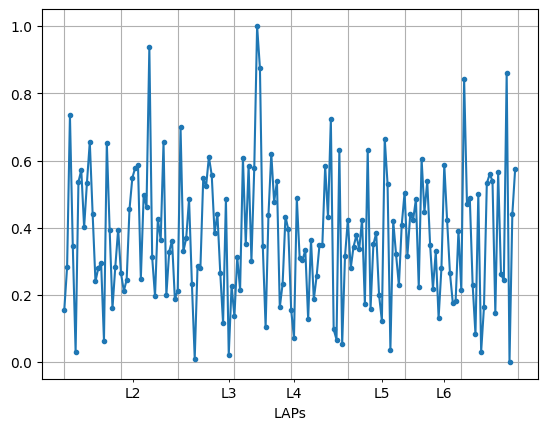

In [ ]:
ax1=plt.subplot(111)
plt.plot(data['WL'],'.-'),plt.grid()
ax1.tick_params(bottom=False)
ax1.set_xticklabels('')
ax1.set_xticks([0, 24.106, 58.02, 81.06, 112.06, 134.008], minor=True)
ax1.set_xticklabels(['L1', 'L2','L3','L4','L5', 'L6'], minor=True)
ax1.set(xlabel ="LAPs")

In [ ]:
data.shape

(160, 4)

In [ ]:
LAPS= []
LAPS.append(['L1']*24)
LAPS.append(['L2']*34)
LAPS.append(['L3']*33)
LAPS.append(['L4']*21)
LAPS.append(['L5']*22)
LAPS.append(['L6']*26)

In [ ]:
# initializing list of lists
test_list = ['L1', 'L2', 'L3', 'L4','L5', 'L6']

# printing original list
print("The original list : " + str(test_list))

# declaring magnitude of repetition
K = [24, 34, 33, 21, 22, 26]

# using list comprehension
# repeat elements K times
res = []
for ele in K:
  res = list(itertools.chain.from_iterable(itertools.repeat(i,ele) for i in test_list))

print(data.shape[0],len(res))

The original list : ['L1', 'L2', 'L3', 'L4', 'L5', 'L6']


NameError: ignored

In [ ]:
res

[Text(0.5, 0, 'LAPs')]

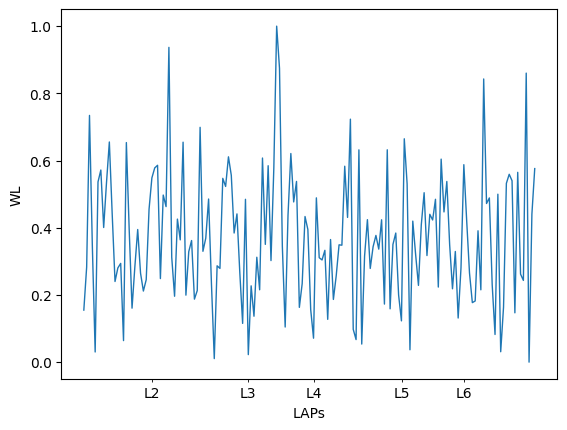

In [ ]:
a = sns.lineplot(x=np.arange(0,len(data)), y=data['WL'], markers=True, dashes=False,linewidth=1, legend=False)
a.tick_params(bottom=False)
a.set_xticklabels('')
a.set_xticks([0, 24.106, 58.02, 81.06, 112.06, 134.008], minor=True)
a.set_xticklabels(['L1', 'L2','L3','L4','L5', 'L6'], minor=True)
a.set(xlabel ="LAPs")

[Text(0.5, 0, 'LAPs')]

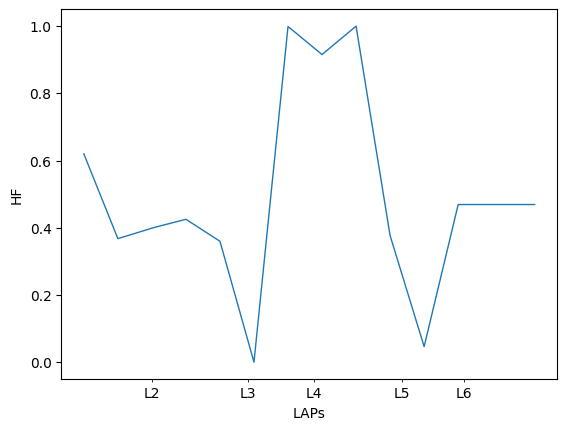

In [ ]:
b = sns.lineplot(x=np.arange(0,160), y=data['HF'], linewidth=1, legend=False)
b.tick_params(bottom=False)
b.set_xticklabels('')
b.set_xticks([0, 24.106, 58.02, 81.06, 112.06, 134.008], minor=True)
b.set_xticklabels(['L1', 'L2','L3','L4','L5', 'L6'], minor=True)
b.set(xlabel ="LAPs")

[Text(0.5, 0, 'LAPs')]

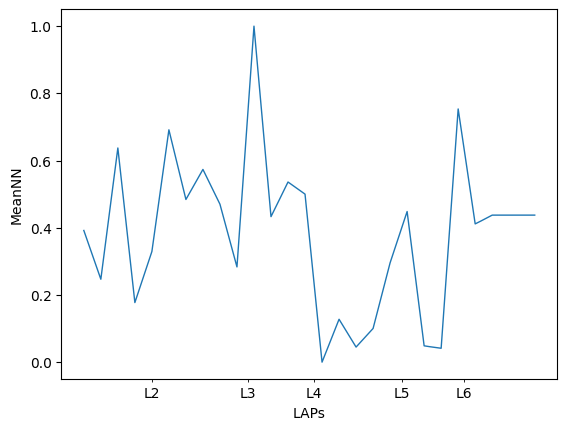

In [ ]:
c = sns.lineplot(x=np.arange(0,160), y=data['MeanNN'], linewidth=1, legend=False)
c.tick_params(bottom=False)
c.set_xticklabels('')
c.set_xticks([0, 24.106, 58.02, 81.06, 112.06, 134.008], minor=True)
c.set_xticklabels(['L1', 'L2','L3','L4','L5', 'L6'], minor=True)
c.set(xlabel ="LAPs")

[Text(0.5, 0, 'LAPs')]

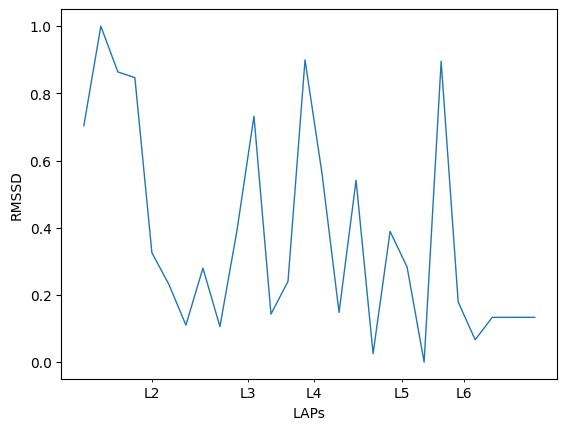

In [ ]:
d = sns.lineplot(x=np.arange(0,160), y=data['RMSSD'], linewidth=1, legend=False)
d.tick_params(bottom=False)
d.set_xticklabels('')
d.set_xticks([0, 24.106, 58.02, 81.06, 112.06, 134.008], minor=True)
d.set_xticklabels(['L1', 'L2','L3','L4','L5', 'L6'], minor=True)
d.set(xlabel ="LAPs")

In [ ]:
f = ['WL', 'HF', 'MeanNN', 'RMSSD']

# Scale Train data
train_scaled = scale_data(data, f)

# SAve Scaled Train data
prepare_data(train_scaled,f,file_name='/content/drive/MyDrive/Work/TICC_indices.txt')
prepare_data(train_scaled,f,file_name='/content/drive/MyDrive/Work/TICC_indices.txt')

Saving Done
Saving Done


# Parameter tuning

In [ ]:
# change parameters here
WINDOW  = 1
lamb    = 0.1
bet     = 3
n_class = 2

dfs_tmp = []
maxIters=200
threshold=1e-6

In [ ]:
labels10, MRFS10 = train_model(classes_nb=n_class,lambda_parameter=lamb,beta=bet,maxIters=maxIters,threshold=threshold,window_size=WINDOW,file_name='/content/drive/MyDrive/Work/TICC_indices.txt')
dfs           = data
dfs['labels'] = labels10
dfs['labels']

('lam_sparse', 0.1)
('switch_penalty', 3)
('num_cluster', 2)
('num stacked', 1)
completed getting the data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


('OPTIMIZATION for Cluster #', 0, 'DONE!!!')
('OPTIMIZATION for Cluster #', 1, 'DONE!!!')
('length of the cluster ', 0, '------>', 67)
('length of the cluster ', 1, '------>', 93)
beginning the smoothening ALGORITHM
Done writing the figure
('OPTIMIZATION for Cluster #', 0, 'DONE!!!')
('OPTIMIZATION for Cluster #', 1, 'DONE!!!')
('length of the cluster ', 0, '------>', 98)
('length of the cluster ', 1, '------>', 62)
beginning the smoothening ALGORITHM
Done writing the figure
('OPTIMIZATION for Cluster #', 0, 'DONE!!!')
('OPTIMIZATION for Cluster #', 1, 'DONE!!!')
('length of the cluster ', 0, '------>', 103)
('length of the cluster ', 1, '------>', 57)
beginning the smoothening ALGORITHM
Done writing the figure
('OPTIMIZATION for Cluster #', 0, 'DONE!!!')
('OPTIMIZATION for Cluster #', 1, 'DONE!!!')
('length of the cluster ', 0, '------>', 109)
('length of the cluster ', 1, '------>', 51)
beginning the smoothening ALGORITHM
Done writing the figure
('OPTIMIZATION for Cluster #', 0, 'DON

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
155    0.0
156    0.0
157    0.0
158    0.0
159    0.0
Name: labels, Length: 160, dtype: float64

# Clustering results

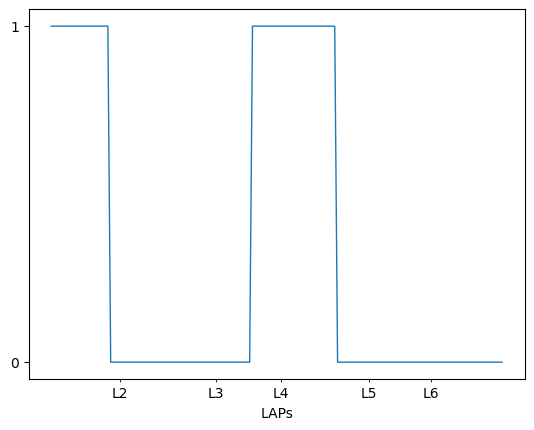

In [ ]:
r = sns.lineplot(x=np.arange(0,160), y=labels10, linewidth=1, legend=False)
r.tick_params(bottom=False)
r.set_xticklabels('')
r.set_xticks([0, 24.106, 58.02, 81.06, 112.06, 134.008], minor=True)
r.set_xticklabels(['L1', 'L2','L3','L4','L5', 'L6'], minor=True)
r.set(xlabel ="LAPs")
r.set_yticks([0,1])

In [ ]:
plt.tight_layout()
r.figure.savefig('chr', dpi=300)

<Figure size 640x480 with 0 Axes>

In [ ]:
# Features mean values on obtained clusters
WL0 = dfs.loc[dfs['labels'] == 0, 'WL'].mean()
WL1 = dfs.loc[dfs['labels'] == 1, 'WL'].mean()

MeanNN0 = dfs.loc[dfs['labels'] == 0, 'MeanNN'].mean()
MeanNN1 = dfs.loc[dfs['labels'] == 1, 'MeanNN'].mean()

RMSSD0 = dfs.loc[dfs['labels'] == 0, 'RMSSD'].mean()
RMSSD1 = dfs.loc[dfs['labels'] == 1, 'RMSSD'].mean()

HF0 = dfs.loc[dfs['labels'] == 0, 'HF'].mean()
HF1 = dfs.loc[dfs['labels'] == 1, 'HF'].mean()

In [ ]:
tabl = pd.DataFrame([[WL0, MeanNN0, HF0, RMSSD0], [WL1, MeanNN1, HF1, RMSSD1]], columns=['WL', 'MeanNN', 'HF', 'RMSSD'])
tabl

WL    MeanNN        HF     RMSSD
0  0.382101  0.430800  0.372311  0.261872
1  0.348013  0.280864  0.741779  0.626701

In [ ]:
def plot_circuit_p_lc_new(data,title):
    colors_ply=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

    df=data.copy()
    labels_ticc = df['labels'].values

    labels_list=list(labels_ticc)
    labels_hex=[]
    for e in labels_list:

        if e ==0:
            hex_color = colors_ply[0]
        if e ==1:
            hex_color = colors_ply[1]
        if e ==2:
            hex_color = colors_ply[2]
        if e ==3:
            hex_color = colors_ply[3]
        if e ==4:
            hex_color = colors_ply[4]
        if e ==5:
            hex_color = colors_ply[5]
        if e ==6:
            hex_color = colors_ply[6]
        if e ==7:
            hex_color = colors_ply[7]
        if e ==8:
            hex_color = colors_ply[8]
        if e ==9:
            hex_color = colors_ply[9]

        labels_hex.append(hex_color)


    sns.set_style('darkgrid')
    sns.set_context("paper")
    x  = np.array(df['GPS2-longitude'].values - df['GPS2-longitude'].values[0])
    y  = np.array(df['GPS2-latitude'].values - df['GPS2-latitude'].values[0])

    #plt.figure()
    fig, ax = plt.subplots(figsize=(20,10),dpi=300)
    #plt.scatter(x,y,c=labels_hex,cmap='gist_rainbow',linewidths=0.01)

    plt.xticks(np.arange(-1000, 1000, 20), fontsize=14)
    plt.yticks(np.arange(-1000, 1000, 20), fontsize=14)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.hstack([points[:-1], points[1:]])    # Create a continuous norm to map from data points to colors
    fastest_driver_array = df['labels'].to_numpy().astype(float)

    coll = LineCollection(segments)
    #coll.set_array(fastest_driver_array)
    coll.set_linewidth(5)
    coll.set_color(labels_hex)
    #ax.add_collection(coll)

    plt.xlabel("$X$ (m)",fontsize=14)
    plt.ylabel("$Y$ (m)",fontsize=14)


    #fig, ax = plt.subplots()
    ax.add_collection(coll)
    ax.autoscale_view()
    #ax.set_xlim(x.min(), x.max())
    #ax.set_ylim(y.min(), y.max())
    ax.set_aspect('equal', adjustable='box')
#     ax.axis('off')    #DE-COMMENT THIS LINE TO REMOVE THE AXES AND THE BACKGROUND
    fig.show()

    return(fig)

In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection

In [ ]:
def plot_graph_p_lc_stack(data,features,names):
        #colors_ply=["#0000FF","#00FFFF","#FFFF00","#FF0000","#9400D3","#52F1AC","#FF00FF",
    #       "#C5C5FF", "#CDAA7D","#FA8072"]
    colors_ply=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

    df          = data.copy()
    labels_ticc = data['labels']

    df           = df[features]
    feat         = df.columns
    l            = len(feat)

    labels_list  =list(labels_ticc)
    labels_hex   =[]
    for e in labels_list:

        if e ==0:
            hex_color = colors_ply[0]
        if e ==1:
            hex_color = colors_ply[1]
        if e ==2:
            hex_color = colors_ply[2]
        if e ==3:
            hex_color = colors_ply[3]
        if e ==4:
            hex_color = colors_ply[4]
        if e ==5:
            hex_color = colors_ply[5]
        if e ==6:
            hex_color = colors_ply[6]
        if e ==7:
            hex_color = colors_ply[7]
        if e ==8:
            hex_color = colors_ply[8]
        if e ==9:
            hex_color = colors_ply[9]

        labels_hex.append(hex_color)


    fig,ax=plt.subplots(l,1,sharex=True,figsize=(20, len(names)*2.5),dpi=600)
#     fig.text(0.5, 0.04, 'Timestamp', ha='center',size=15, fontweight ="bold")    #Use this for timestamp instead of time
#     fig.text(0.5, 0.04, 'Time (s)', ha='center',size=15, fontweight ="bold")
#     fig.suptitle('Features view', fontweight ="bold",size=15,y=0.92)

    for i in range(l):
#         x = np.array(df.index.values)    #Use this for timestamp instead of time
        x = np.array(df.index.values)
        y = np.array(df[feat[i]].values)
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.hstack([points[:-1], points[1:]])    # Create a continuous norm to map from data points to colors
        fastest_driver_array = data['labels'].to_numpy().astype(float)

        norm = plt.Normalize(y.min(), y.max())
        cmap = ListedColormap(colors_ply)

        coll = LineCollection(segments)
        coll.set_array(fastest_driver_array)
        coll.set_color(labels_hex)
        ax[i].add_collection(coll)
        ax[i].autoscale_view()
        coll.set_linewidth(4)
        ax[i].set_ylabel('{}'.format(names[i]),size=16)
        ax[i].tick_params(axis="x", labelsize=100)
        ax[i].tick_params(axis="y", labelsize=14)
        d = ax[i]
        d.tick_params(bottom=False)
        d.set_xticklabels('')
        d.set_xticks([0, 24.106, 58.02, 81.06, 112.06, 134.008], minor=True)
        d.set_xticklabels(['L1', 'L2','L3','L4','L5', 'L6'], minor=True)
        #d.set(xlabel ="LAPs")

    #d = ax[-1]
    #ax[-1].set_xlabel('Time (s)', size=15, fontweight ="bold")
    #d.tick_params(bottom=False)
    #d.set_xticklabels('')
    #d.set_xticks([0, 24.106, 58.02, 81.06, 112.06, 134.008], minor=True)
    #d.set_xticklabels(['L1', 'L2','L3','L4','L5', 'L6'], minor=True)
    d.set(xlabel ="LAPs")


    return fig

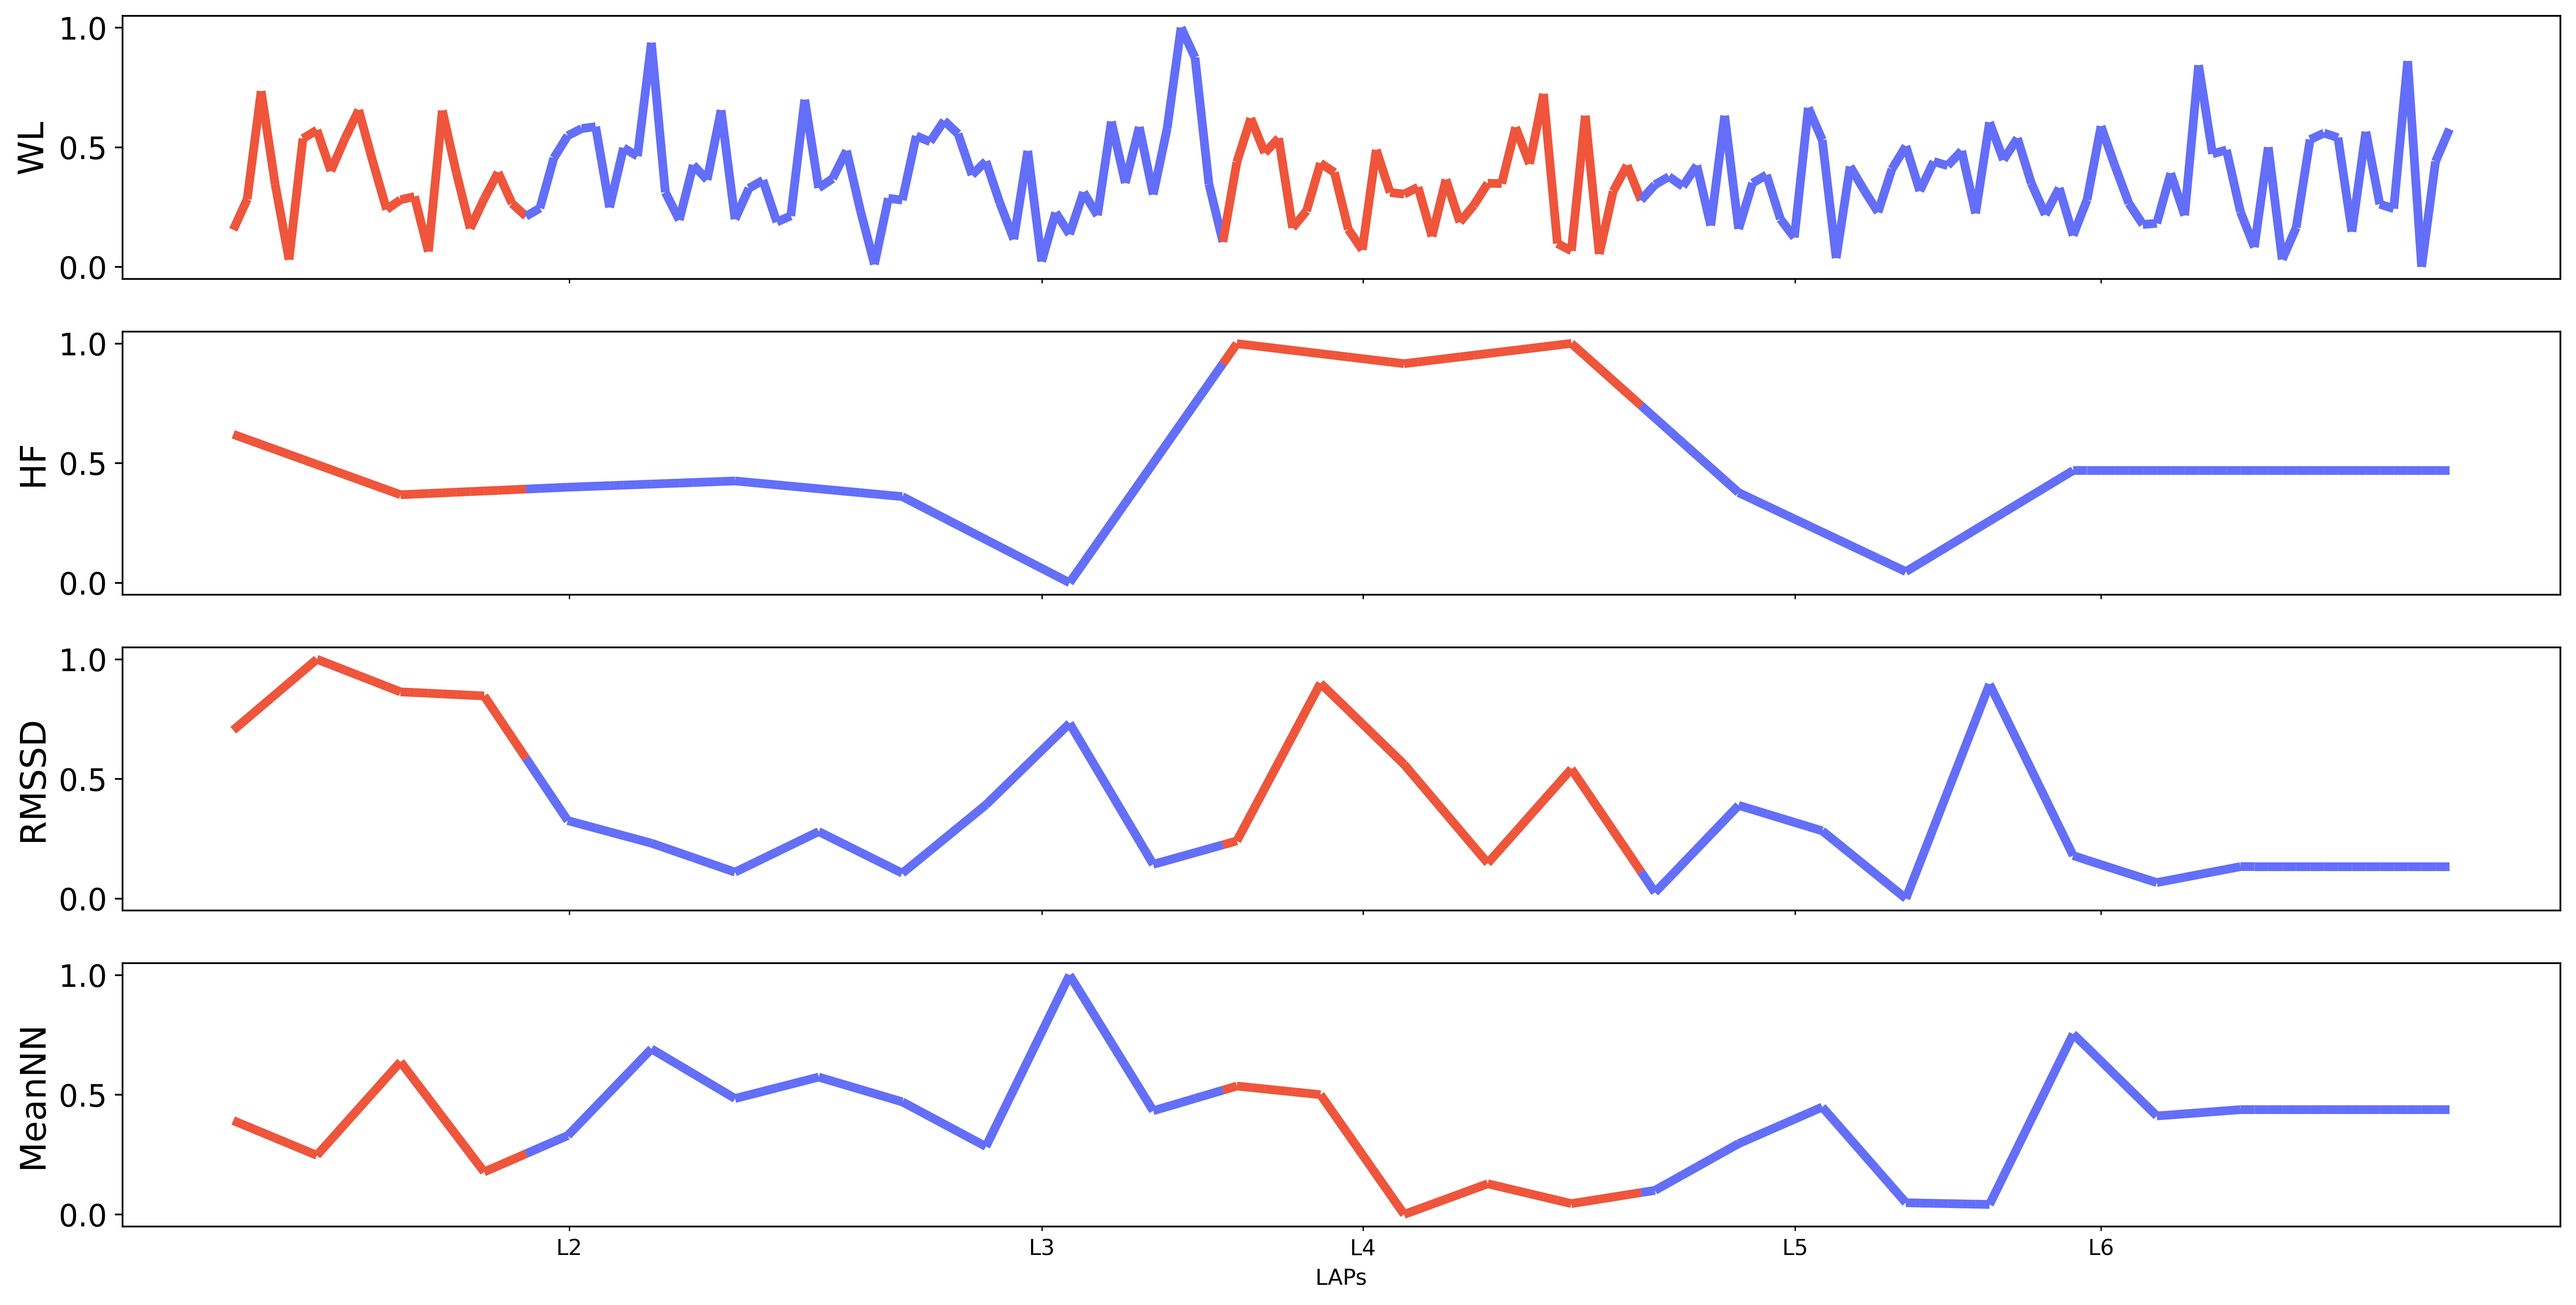

In [ ]:
yy = plot_graph_p_lc_stack(dfs,['WL', 'HF', 'RMSSD', 'MeanNN'],['WL', 'HF', 'RMSSD', 'MeanNN']);

In [ ]:
plt.tight_layout()
yy.figure.savefig('ffn', dpi=300)

<Figure size 640x480 with 0 Axes>

# **===============Comparison clustering methods=====================**

# Comparative study of clustering algos

In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.7 MB/s eta 0:00:00



Compare-Models



In [ ]:

from sklearn.cluster import KMeans,Birch,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score,confusion_matrix, f1_score
from hmmlearn import hmm
from hmmlearn.utils import normalize
from itertools import permutations

In [ ]:
testdf =  data

In [ ]:
KM_sil=0
KM_cal=0
KM_dav=0

kmeans = KMeans(n_clusters=n_class, random_state=0,init='random').fit(testdf)
KM_clusters=kmeans.predict(testdf)
KM_sil+=silhouette_score(testdf,KM_clusters)
KM_cal+=calinski_harabasz_score(testdf,KM_clusters)
KM_dav+=davies_bouldin_score(testdf,KM_clusters)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


** *texte en italique* KMeans : **

In [ ]:
labels10, MRFS10 = train_model(classes_nb=n_class,lambda_parameter=lamb,beta=bet,maxIters=maxIters,threshold=threshold,window_size=WINDOW,file_name='/content/drive/MyDrive/Work/TICC_indices.txt')

sil_ticc=0
cal_ticc=0
dav_ticc=0

sil_ticc+=silhouette_score(testdf,labels10)
cal_ticc+=calinski_harabasz_score(testdf,labels10)
dav_ticc+=davies_bouldin_score(testdf,labels10)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


('lam_sparse', 0.1)
('switch_penalty', 3)
('num_cluster', 2)
('num stacked', 1)
completed getting the data
('OPTIMIZATION for Cluster #', 0, 'DONE!!!')
('OPTIMIZATION for Cluster #', 1, 'DONE!!!')
('length of the cluster ', 0, '------>', 67)
('length of the cluster ', 1, '------>', 93)
beginning the smoothening ALGORITHM
Done writing the figure
('OPTIMIZATION for Cluster #', 0, 'DONE!!!')
('OPTIMIZATION for Cluster #', 1, 'DONE!!!')
('length of the cluster ', 0, '------>', 98)
('length of the cluster ', 1, '------>', 62)
beginning the smoothening ALGORITHM
Done writing the figure
('OPTIMIZATION for Cluster #', 0, 'DONE!!!')
('OPTIMIZATION for Cluster #', 1, 'DONE!!!')
('length of the cluster ', 0, '------>', 103)
('length of the cluster ', 1, '------>', 57)
beginning the smoothening ALGORITHM
Done writing the figure
('OPTIMIZATION for Cluster #', 0, 'DONE!!!')
('OPTIMIZATION for Cluster #', 1, 'DONE!!!')
('length of the cluster ', 0, '------>', 109)
('length of the cluster ', 1, '-----

In [ ]:
l=len(testdf)
gmm_sil=0
gmm_cal=0
gmm_dav=0

GMM=GaussianMixture(n_components=2,random_state=0).fit(testdf)
gmm_clusters=GMM.predict(testdf)
gmm_sil+=silhouette_score(testdf,gmm_clusters)
gmm_cal+=calinski_harabasz_score(testdf,gmm_clusters)
gmm_dav+=davies_bouldin_score(testdf,gmm_clusters)





In [ ]:
AG_sil=0
AG_cal=0
AG_dav=0


Agglo=AgglomerativeClustering(n_clusters=2,linkage="average", affinity='euclidean').fit(testdf)
AG_clusters=Agglo.labels_
AG_sil+=silhouette_score(testdf,AG_clusters)
AG_cal+=calinski_harabasz_score(testdf,AG_clusters)
AG_dav+=davies_bouldin_score(testdf,AG_clusters)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
n_components = 2 # le nombre d'états
GMM_mix_num = 1
transmatPrior = np.zeros((n_components, n_components)) # number of states

# Left-to-right: each state is connected to itself and its
# direct successor.
for i in range(n_components):
    if i == n_components - 1:
        transmatPrior[i, i] = 1.0
    else:
        transmatPrior[i, i] = transmatPrior[i, i + 1] = 0.5

# Always start in first state
startprobPrior = np.zeros(n_components)
#startprobPrior[0] = 1.0

model = hmm.GaussianHMM(n_components, startprob_prior=startprobPrior,
                  covariance_type="diag", n_iter=1000, init_params="cm", params="cmt")




hmm_sil=0
hmm_cal=0
hmm_dav=0




model.fit(testdf)
hmm_clusters=model.predict(testdf)
hmm_sil+=silhouette_score(testdf,hmm_clusters)
hmm_cal+=calinski_harabasz_score(testdf,hmm_clusters)
hmm_dav+=davies_bouldin_score(testdf,hmm_clusters)




(<Axes: >, [<matplotlib.lines.Line2D at 0x7f7318237430>], None)

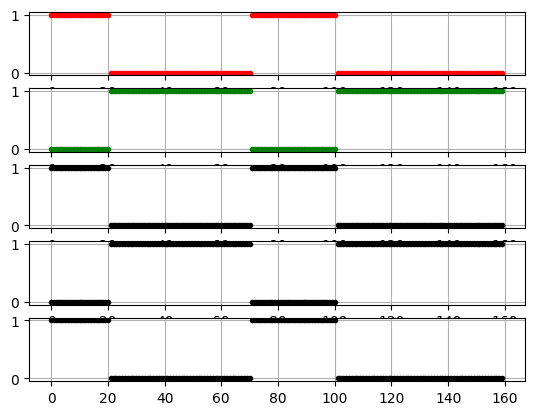

In [ ]:
plt.subplot(511),plt.plot(hmm_clusters,'.r'),plt.grid()
plt.subplot(512),plt.plot(KM_clusters,'.g'),plt.grid()
plt.subplot(513),plt.plot(labels10,'.k'),plt.grid()
plt.subplot(514),plt.plot(AG_clusters,'.k'),plt.grid()
plt.subplot(515),plt.plot(gmm_clusters,'.k'),plt.grid()

In [ ]:

print('Kmeans | silhouette : {:.2f} | calinski  : {:.2f} | Davies : {:.2f}'.format(KM_sil,KM_cal,KM_dav))
print('TICC | silhouette : {:.2f} | calinski  : {:.2f} | Davies : {:.2f}'.format(sil_ticc,cal_ticc,dav_ticc))
print('GMM | silhouette : {:.2f} | calinski  : {:.2f} | Davies : {:.2f}'.format(gmm_sil,gmm_cal,gmm_dav))
print('AG | silhouette : {:.2f} | calinski  : {:.2f} | Davies : {:.2f}'.format(AG_sil,AG_cal,AG_dav))
print('HMM | silhouette : {:.2f} | calinski  : {:.2f} | Davies : {:.2f}'.format(hmm_sil,hmm_cal,hmm_dav))


Kmeans | silhouette : 0.60 | calinski  : 287.25 | Davies : 0.67
TICC | silhouette : 0.60 | calinski  : 287.25 | Davies : 0.67
GMM | silhouette : 0.60 | calinski  : 287.25 | Davies : 0.67
AG | silhouette : 0.60 | calinski  : 287.25 | Davies : 0.67
HMM | silhouette : 0.60 | calinski  : 287.25 | Davies : 0.67


In [ ]:
viz_gmm = dfs
viz_gmm['labels'] = gmm_clusters
viz_gmm

WL        HF    MeanNN     RMSSD  labels
0    0.154863  0.619961  0.391962  0.703452       1
1    0.283103  0.598942  0.367787  0.752875       1
2    0.734339  0.577922  0.343612  0.802298       1
3    0.347091  0.556903  0.319437  0.851720       1
4    0.030246  0.535883  0.295262  0.901143       1
..        ...       ...       ...       ...     ...
155  0.243242  0.469155  0.437613  0.133563       0
156  0.860218  0.469155  0.437613  0.133563       0
157  0.000000  0.469155  0.437613  0.133563       0
158  0.440326  0.469155  0.437613  0.133563       0
159  0.576040  0.469155  0.437613  0.133563       0

[160 rows x 5 columns]

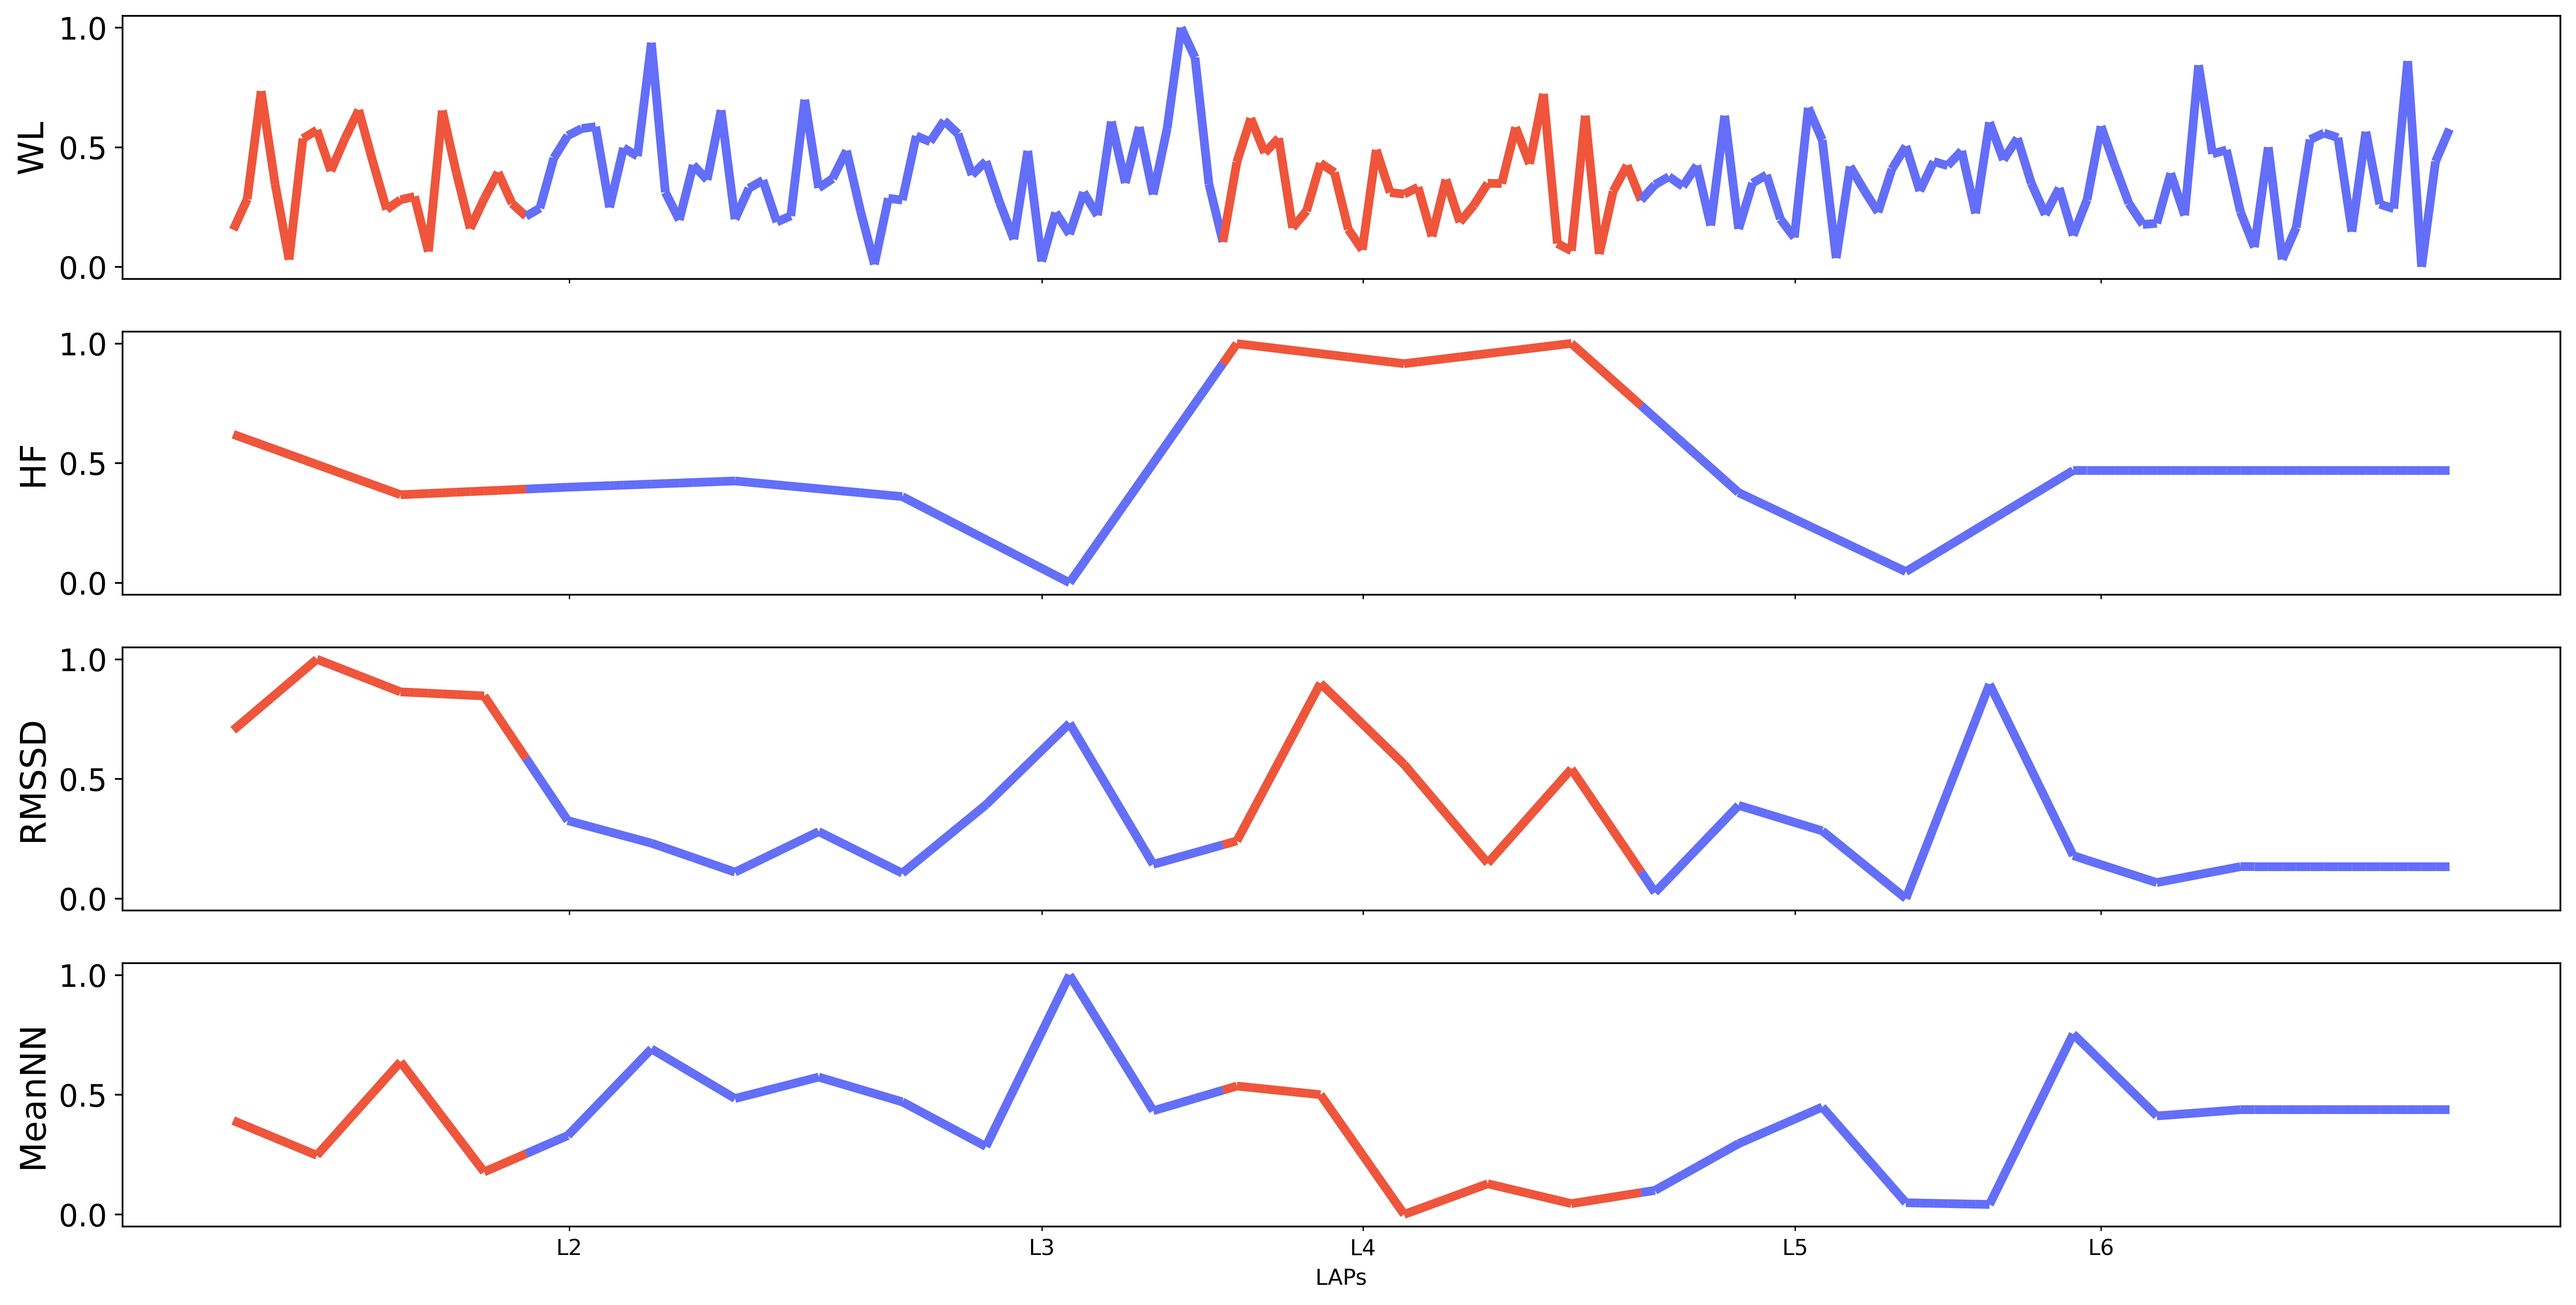

In [ ]:
plot_graph_p_lc_stack(viz_gmm,['WL', 'HF', 'RMSSD', 'MeanNN'],['WL', 'HF', 'RMSSD', 'MeanNN']);